# SC4003 INTELLIGENT AGENTS
## Assignment 1: Agent Decision Making


This assignment covers topics in Module 3: Agent Decision Making. Refer to Chapters 16 and 17 in the reference book “Artificial Intelligence: A Modern Approach” by S. Russell and P. Norvig. Prentice-Hall, third edition, 2010. For the ease of access, a softcopy of these two chapters can be found in the NTULearn system.

__Consider the following maze environment, similar to the one in Section 17.1 of the above reference book. Write a program to solve the following questions. Note that the program can be written in any programming language.__

<p align="center">
    <img src="asset/maze_env.png" alt="maze environment" />
</p>

The transition model is as follows: the intended outcome occurs with probability 0.8, and with probability 0.1 the agent moves at either right angle to the intended direction. If the move would make the agent walk into a wall, the agent stays in the same place as before. The rewards for the white squares are -0.05, for the green squares are +1, and for the brown squares are -1. Note that there are no terminal states; the agent’s state sequence is infinite.

__Part 1:__ Assuming the known transition model and reward function listed above, find the optimal policy and the utilities of all the (non-wall) states using both value iteration and policy iteration. Display the optimal policy and the utilities of all the states, and plot utility estimates as a function of the number of iterations as in Figure 17.5(a) in the above reference book. In this question, use a discount factor of 0.99.

<p align="center">
    <img src="asset/figure_17.5(a).png" alt="Figure 17.5(a)" />
</p>

__Part 2:__ Design a more complicated maze environment of your own and re-run the algorithms designed for Part 1 on it. How does the number of states and the complexity of the environment affect convergence? How complex can you make the environment and still be able to learn the right policy?

# Preparation

### Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from config import *
from algorithms.value_iteration   import *
from algorithms.algorithm_utility import *
from algorithms.policy_iteration  import *

pygame-ce 2.5.3 (SDL 2.30.12, Python 3.12.6)


### Display the given maze environment

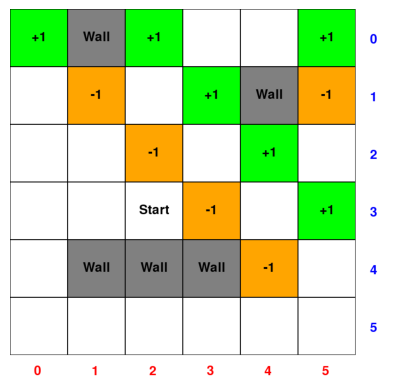

# Maze size
MAZE_WIDTH  = 6
MAZE_HEIGHT = 6

# Starting position
START_POS = (2, 3)

# Green squares  — Count: 6
(0, 0), (2, 0), (5, 0), (3, 1), (4, 2), (5, 3)

# Brown squares  — Count: 5
(1, 1), (5, 1), (2, 2), (3, 3), (4, 4)

# Wall locations — Count: 5  
(2, 4), (3, 4), (1, 0), (4, 1), (1, 4)

# White squares  — Count: 20


In [2]:
# display the given maze environment
set_maze_type('given')
visualize_env('given_env')

# text output
def format_cells(cells, columns=6):
    if isinstance(cells, dict):
        cells = list(cells.keys())
    else:
        cells = list(cells)
    
    lines = [', '.join(str(cell) for cell in cells[i:i + columns]) for i in range(0, len(cells), columns)]

    return '\n'.join(lines)

# calculate the number of white squares
total_cells = given.MAZE_WIDTH * given.MAZE_HEIGHT
num_white = total_cells - len(given.GRN_SQ) - len(given.BRN_SQ) - len(given.WALL)

# display the maze details
print(f"# Maze size\nMAZE_WIDTH  = {given.MAZE_WIDTH}\nMAZE_HEIGHT = {given.MAZE_HEIGHT}\n")
print(f"# Starting position\nSTART_POS = {given.START_POS}\n")
print(f"# Green squares  — Count: {len(given.GRN_SQ)}\n{format_cells(given.GRN_SQ)}\n")
print(f"# Brown squares  — Count: {len(given.BRN_SQ)}\n{format_cells(given.BRN_SQ)}\n")
print(f"# Wall locations — Count: {len(given.WALL)}  \n{format_cells(given.WALL)}\n")
print(f"# White squares  — Count: {num_white}")

# Part 1
## 1.1 `Value Iteration`

**<u>Value Iteration</u>**
- Start out with every  U(s) = 0
- Iterate until convergence
  - During the \( i \)-th iteration, update the utility of each state according to this rule:

$$
U_{i+1}(s) \leftarrow R(s) + \gamma \max_{a \in A(s)} \sum_{s'} P(s' | s, a) U_i(s')
$$

- In the limit of infinitely many iterations, the correct utility values are guaranteed.
    - In practice, do not need an infinite number of iterations.

### Run the Value Iteration algorithm
- Get the number of iterations and time taken to converge

In [3]:
start_time = time.time()                                    # start timing
vi_env, vi_iterations_cnt = value_iteration(init_vi_env())  # initialize the environment and perform value iteration
vi_policy  = generate_policy(vi_env)                        # generate the optimal policy

end_time     = time.time()
elapsed_time = end_time - start_time                        # calculate elapsed time

vi_cnt_1  = vi_iterations_cnt
vi_time_1 = elapsed_time

print(f'Value iteration converged in {vi_cnt_1} iterations')
print(f'Time taken for convergence: {vi_time_1:.4f} seconds')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')

Value iteration converged in 1145 iterations
Time taken for convergence: 0.7206 seconds


### Display the optimal Value Iteration policy

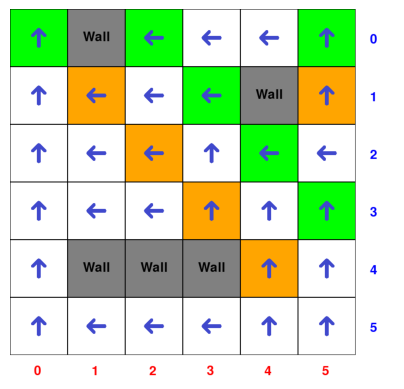

In [4]:
# display the optimal value iteration policy
visualize_policy(vi_policy, 'value_iteration_policy')

### __Optimal Value Iteration Policy Observation__
- From the visualization of the optimal value iteration policy, we notice a clear tendency for the agent to navigate towards the top left corner.

### Display the Value Iteration utilities of all the states

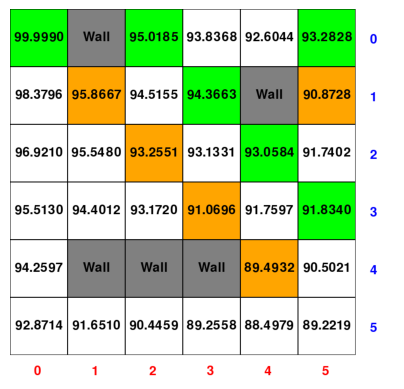

In [5]:
# display the value iteration utilities of all the values
visualize_utility(vi_env, 'value_iteration_utility')

### Plot of Value Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

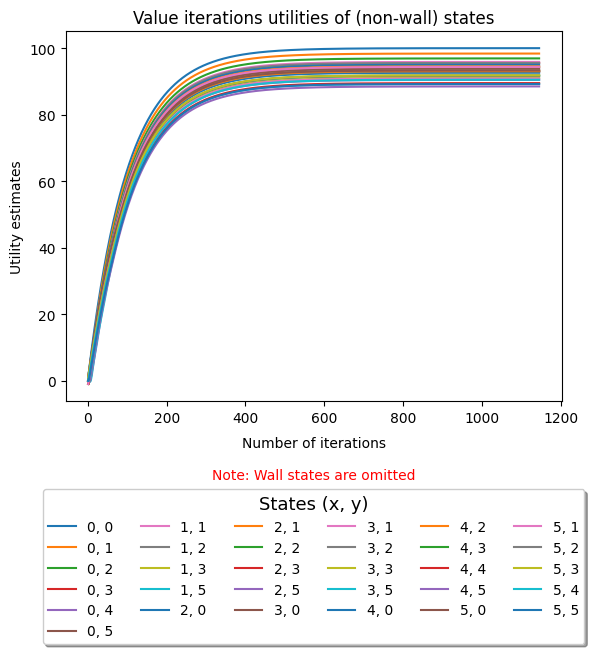

In [6]:
# load results
vi_results = pd.read_csv(get_path() + '/result/value_iteration/vi_results.csv')

# group by states (x, y)
groups = vi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Value iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# legend formatting
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), ncol=6, prop={'size': 10}, 
           title='States (x, y)', title_fontsize='13', frameon=True, shadow=True)

# show plot
plt.show()

# Part 1
## 1.2 `Policy Iteration`

**<u>Policy Iteration</u>**

* Start with some initial policy $\pi_0$ and alternate between the following steps:
    * __Policy evaluation:__ calculate $U^{\pi_i}(s)$ for every state $s$
    * __Policy improvement:__ calculate a new policy $\pi_{i+1}$ based on the updated utilities

$$
\pi^{(i+1)}(s) = \arg \max_{a \in A(s)} \sum_{s'} P(s' | s, a) U^{(\pi_i)}(s')
$$


**<u>Policy Evaluation</u>**

* Given a fixed policy $\pi$, calculate $U^{\pi}(s)$ for every state $s$
* The Bellman equation for the optimal policy:

$$
U(s) = R(s) + \max_{a} \sum_{s'} P(s' | s, a) U(s')
$$

<div style="margin-left: 40px;">
&bullet; How does it need to change if our policy is fixed?
</div>

$$
U^\pi(s) = R(s) + \gamma \sum_{s'} P(s' | s, \pi(s)) U^\pi(s')
$$

<div style="margin-left: 40px;">
&bullet; Can solve a linear system to get all the utilities!
<br><br>
&bullet; Alternatively, can apply the following update:
</div>

$$
U_{i+1}(s) \leftarrow R(s) + \gamma \sum_{s'} P(s' | s, \pi_i(s)) U_i(s')
$$

### Run the Policy Iteration algorithm
- Get the number of iterations and time taken to converge
- (Using a seed number for reproducible results)

In [7]:
start_time = time.time()                                                    # start timing
pi_env, pi_policy = init_pi_env()                                           # initialize the environment
pi_env, pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy)  # perform policy iteration

end_time     = time.time()
elapsed_time = end_time - start_time                                        # calculate elapsed time

pi_cnt_1  = pi_iterations_cnt
pi_time_1 = elapsed_time

print(f'\nValue iteration converged in {pi_cnt_1} iterations')
print(f'Time taken for convergence: {pi_time_1:.4f} seconds\n')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')


Value iteration converged in 6 iterations
Time taken for convergence: 0.1769 seconds



### Display the optimal Policy Iteration policy

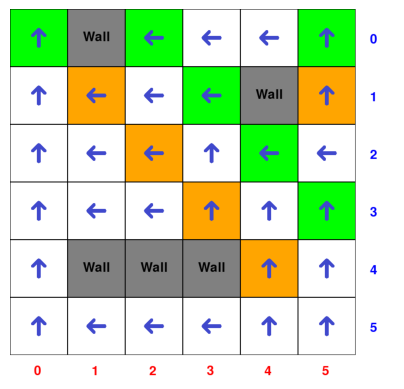

In [8]:
# visualize the optimal policy iteration policy
visualize_policy(pi_policy, 'policy_iteration_policy')

### Display the Policy Iteration utilities of all the states

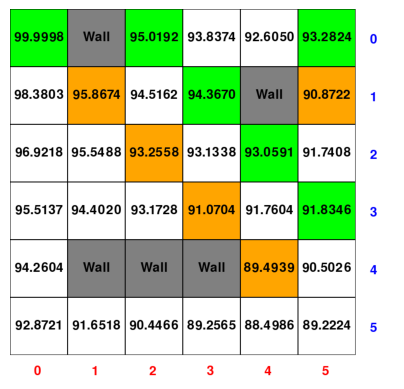

In [9]:
# display the policy iteration utilities of all the states
visualize_utility(pi_env, 'policy_iteration_utility')

### Plot Policy Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

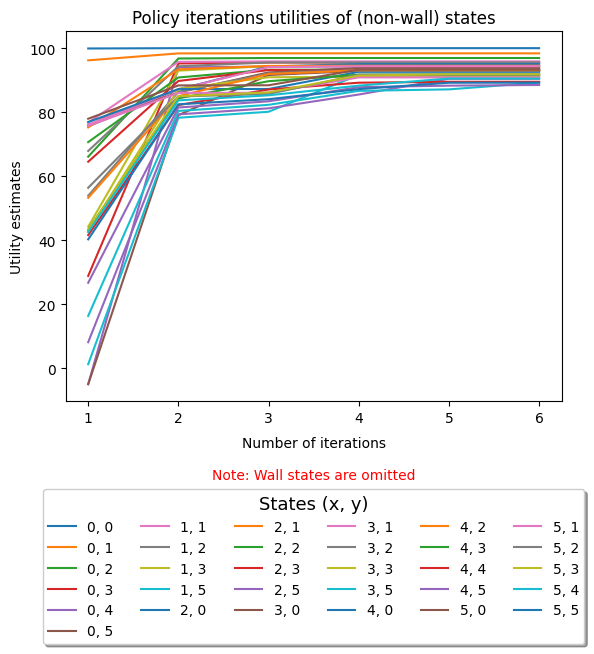

In [10]:
# load results
pi_results = pd.read_csv(get_path() + '/result/policy_iteration/pi_results.csv')

# group by states (x, y)
groups = pi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Policy iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# legend formatting
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), ncol=6, prop={'size': 10}, 
           title='States (x, y)', title_fontsize='13', frameon=True, shadow=True)

# show plot
plt.show()

### Policy Iteration Observation

In [11]:
# given maze
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze\n')

# value iteration results
print(f'- Value iteration converged in {vi_cnt_1} iterations')
print(f'- Time taken for convergence: {vi_time_1:.4f} seconds\n')

# policyiteration results
print(f'- Policy iteration converged in {pi_cnt_1} iterations')
print(f'- Time taken for convergence: {pi_time_1:.4f} seconds\n')

# amplitude
print(f'Amplitude of policy_iteration_time_1 over value_iteration_time_1 is {pi_time_1 / vi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze

- Value iteration converged in 1145 iterations
- Time taken for convergence: 0.7206 seconds

- Policy iteration converged in 6 iterations
- Time taken for convergence: 0.1769 seconds

Amplitude of policy_iteration_time_1 over value_iteration_time_1 is 0.25


#### Part 1 Observation
•	The visualization of the optimal Policy Iteration policy reveals that it is identical to the Value Iteration policy, confirming consistency between the two methods.

•	Policy Iteration achieved significantly faster convergence compared to Value Iteration.

•	Policy iteration demonstrates a shorter convergence time relative to value iteration.

# Part 2 More complicated maze environment

## Generate a 10x10 maze with random configurations
#### (Using a seed number for reproducible results)

### Display the 10x10 maze environment

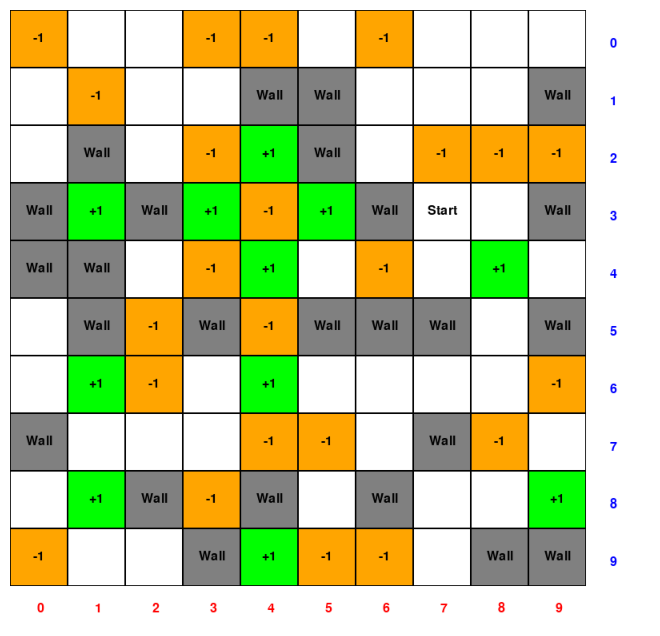

# Maze size
MAZE_WIDTH  = 10
MAZE_HEIGHT = 10

# Starting position
START_POS = (7, 3)

# Green squares  — Count: 11
(4, 4), (8, 4), (4, 9), (1, 8), (4, 6), (4, 2), (3, 3), (9, 8), (5, 3), (1, 6)
(1, 3)

# Brown squares  — Count: 23
(4, 0), (3, 4), (4, 3), (9, 2), (5, 7), (2, 5), (3, 0), (4, 5), (5, 9), (8, 2)
(6, 4), (3, 2), (4, 7), (3, 8), (0, 0), (8, 7), (1, 1), (9, 6), (0, 9), (2, 6)
(7, 2), (6, 0), (6, 9)

# Wall locations — Count: 25  
(5, 1), (9, 5), (8, 9), (2, 8), (7, 7), (6, 5), (6, 8), (3, 9), (4, 8), (9, 1)
(0, 7), (1, 2), (0, 4), (1, 5), (4, 1), (3, 5), (5, 2), (5, 5), (9, 3), (9, 9)
(0, 3), (1, 4), (2, 3), (7, 5), (6, 3)

# White squares  — Count: 41


In [12]:
# set the figure size
plt.figure(figsize=(10, 8))

# visualize the environment of medium complex maze
set_maze_type('maze_10x10')
visualize_env('maze_10x10_env')

# text output
def format_cells(cells, columns=10):
    if isinstance(cells, dict):
        cells = list(cells.keys())
    else:
        cells = list(cells)
    
    lines = [', '.join(str(cell) for cell in cells[i:i + columns]) for i in range(0, len(cells), columns)]

    return '\n'.join(lines)

# calculate the number of white squares
total_cells = maze_10x10.MAZE_WIDTH * maze_10x10.MAZE_HEIGHT
num_white = total_cells - len(maze_10x10.GRN_SQ) - len(maze_10x10.BRN_SQ) - len(maze_10x10.WALL)

# display the maze details
print(f"# Maze size\nMAZE_WIDTH  = {maze_10x10.MAZE_WIDTH}\nMAZE_HEIGHT = {maze_10x10.MAZE_HEIGHT}\n")
print(f"# Starting position\nSTART_POS = {maze_10x10.START_POS}\n")
print(f"# Green squares  — Count: {len(maze_10x10.GRN_SQ)}\n{format_cells(maze_10x10.GRN_SQ)}\n")
print(f"# Brown squares  — Count: {len(maze_10x10.BRN_SQ)}\n{format_cells(maze_10x10.BRN_SQ)}\n")
print(f"# Wall locations — Count: {len(maze_10x10.WALL)}  \n{format_cells(maze_10x10.WALL)}\n")
print(f"# White squares  — Count: {num_white}")

## 2.1 `Value Iteration`

### Run the Value Iteration algorithm
- Get the number of iterations and time taken to converge

In [13]:
start_time = time.time()                                                # start timing
vi_env = init_vi_env()                                                  # initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env, '10x10_vi_results') # perform value iteration
vi_policy = generate_policy(vi_env)                                     # generate the optimal policy

end_time     = time.time()
elapsed_time = end_time - start_time                                    # calculate elapsed time

vi_cnt_2  = vi_iterations_cnt
vi_time_2 = elapsed_time

print(f'Value iteration converged in {vi_cnt_2} iterations')
print(f'Time taken for convergence: {vi_time_2:.4f} seconds')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')

Value iteration converged in 1145 iterations
Time taken for convergence: 1.2521 seconds


### Display the optimal Value Iteration policy

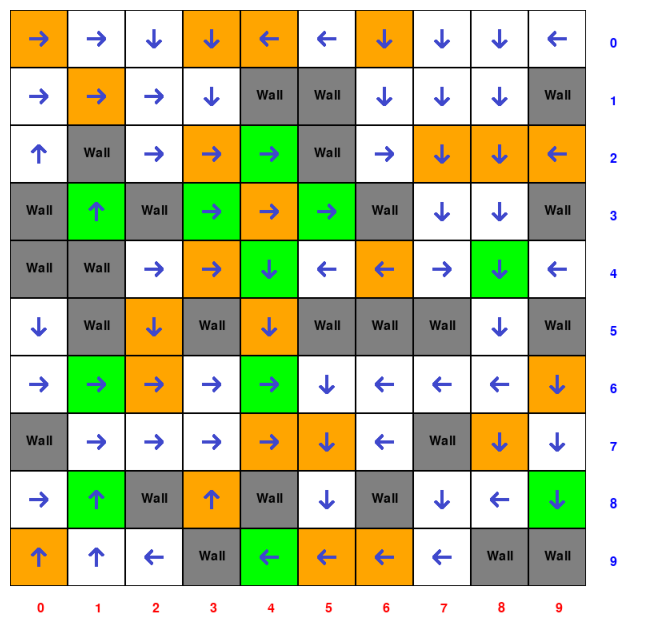

In [14]:
# set the figure size
plt.figure(figsize=(10, 8))

# display the optimal value iteration policy
visualize_policy(vi_policy, '10x10_value_iteration_policy')

### Display the Value Iteration utilities of all the states

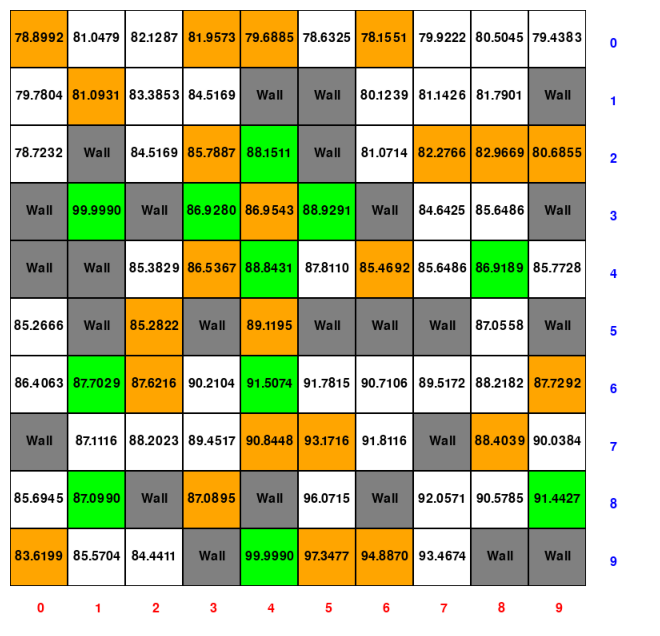

In [15]:
# set the figure size
plt.figure(figsize=(10, 8))

# display the value iteration utilities of all the values
visualize_utility(vi_env, '10x10_value_iteration_utility')

### Plot Value Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

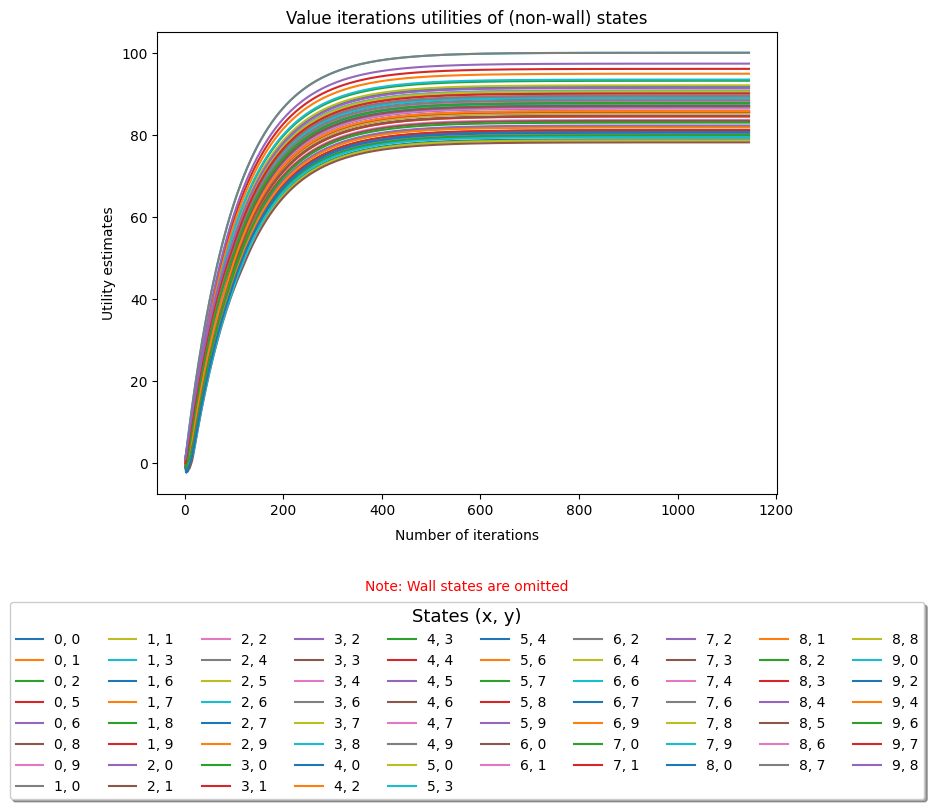

In [16]:
# set the figure size
plt.figure(figsize=(8, 6))

# load results
vi_results = pd.read_csv(get_path() + '/result/value_iteration/10x10_vi_results.csv')

# group by states (x, y)
groups = vi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Value iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# legend formatting
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), ncol=10, prop={'size': 10}, 
           title='States (x, y)', title_fontsize='13', frameon=True, shadow=True)

# show plot
plt.show()

### Value Iteration Observation
- Comparing given maze and 10x10 maze

In [17]:
# given maze results
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze')
print(f'- Value iteration converged in {vi_cnt_1} iterations')
print(f'- Time taken for convergence: {vi_time_1:.4f} seconds\n')

# 10x10 maze results
print(f'10x10 maze algorithm running results:')
print(f'- There are 100 states in the maze')
print(f'- Value iteration converged in {vi_cnt_2} iterations')
print(f'- Time taken for convergence: {vi_time_2:.4f} seconds\n')

# amplitude
print(f'Amplitude of 10x10_time_2 over given_time_1 is {vi_time_2 / vi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 0.7206 seconds

10x10 maze algorithm running results:
- There are 100 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 1.2521 seconds

Amplitude of 10x10_time_2 over given_time_1 is 1.74


### __Value Iteration Observations__
- Although the 10x10 maze contains more states than the given maze,
  they both achieve convergence in an equal number of iterations.

- The convergence time for the 10x10 maze is twice longer than that of the given maze.

## 2.2 `Policy Iteration`

### Run the Policy Iteration algorithm
- Get the number of iterations and time taken to converge
- (Using a seed number for reproducible results)

In [18]:
start_time = time.time()                                                                        # start timing
pi_env, pi_policy = init_pi_env()                                                               # initialize the environment
pi_env, pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy, '10x10_pi_results')  # perform policy iteration

end_time     = time.time()
elapsed_time = end_time - start_time                                                            # calculate elapsed time

pi_cnt_2  = pi_iterations_cnt
pi_time_2 = elapsed_time

print(f'\nPolicy iteration converged in {pi_cnt_2} iterations')
print(f'Time taken for convergence: {pi_time_2:.4f} seconds\n')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')


Policy iteration converged in 9 iterations
Time taken for convergence: 1.0036 seconds



### Display the optimal Policy Iteration policy

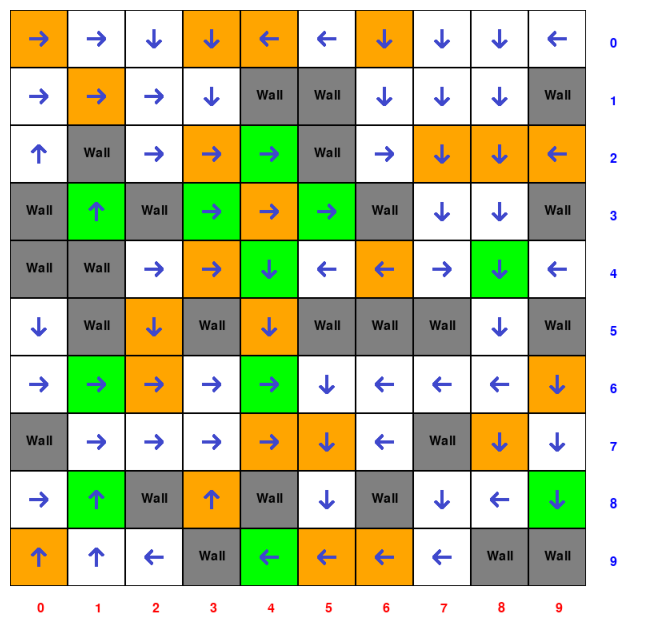

In [19]:
# set the figure size
plt.figure(figsize=(10, 8))

# visualize the optimal policy iteration policy
visualize_policy(pi_policy, '10x10_policy_iteration_policy')

### Display the Policy Iteration utilities of all the states

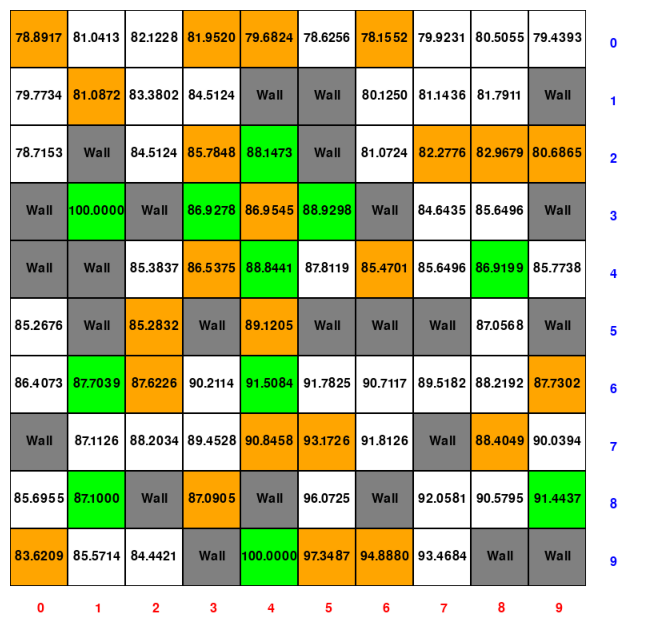

In [20]:
# set the figure size
plt.figure(figsize=(10, 8))

# visualize the utility values
visualize_utility(pi_env, '10x10_policy_iteration_utility')

### Plot Policy Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

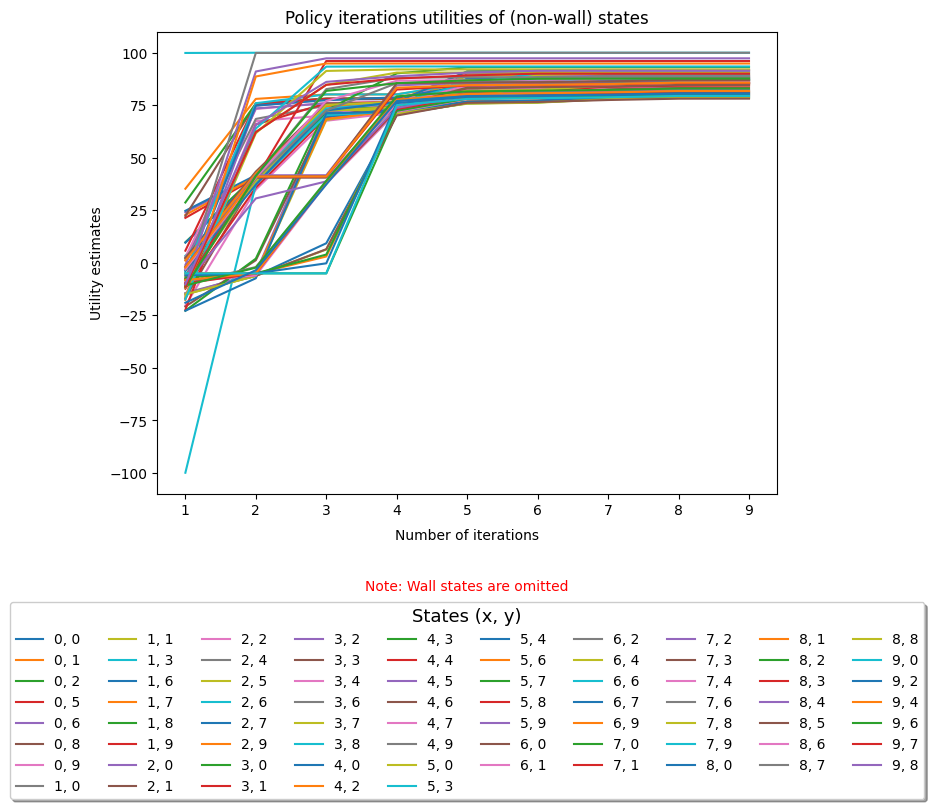

In [21]:
# set the figure size
plt.figure(figsize=(8, 6))

# load results
pi_results = pd.read_csv(get_path() + f'/result/policy_iteration/10x10_pi_results.csv')

# group by states (x, y)
groups = pi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Policy iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# legend formatting
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), ncol=10, prop={'size': 10}, 
           title='States (x, y)', title_fontsize='13', frameon=True, shadow=True)

# show plot
plt.show()

### Policy Iteration Observation
- Comparing given maze and 10x10 maze

In [22]:
# given maze results
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_1} iterations')
print(f'- Time taken for convergence: {pi_time_1:.4f} seconds\n')

# 10x10 maze results
print(f'10x10 maze algorithm running results:')
print(f'- There are 100 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_2} iterations')
print(f'- Time taken for convergence: {pi_time_2:.4f} seconds\n')

# amplitude
print(f'Amplitude of 10x10_time_2 over given_time_1 is {pi_time_2 / pi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze
- Policy iteration converged in 6 iterations
- Time taken for convergence: 0.1769 seconds

10x10 maze algorithm running results:
- There are 100 states in the maze
- Policy iteration converged in 9 iterations
- Time taken for convergence: 1.0036 seconds

Amplitude of 10x10_time_2 over given_time_1 is 5.67


### __Policy Iterations Observations__
- The number of iterations for convergence grows as the number of states increases.

- The convergence time for the 10x10 maze is over 5 times longer than that of the given maze.

# Part 3 - Testing with complex maze environment

## Generate a 50x50 maze with random configurations
#### (Using a random seed for reproducible results)

### Display the 50x50 maze environment

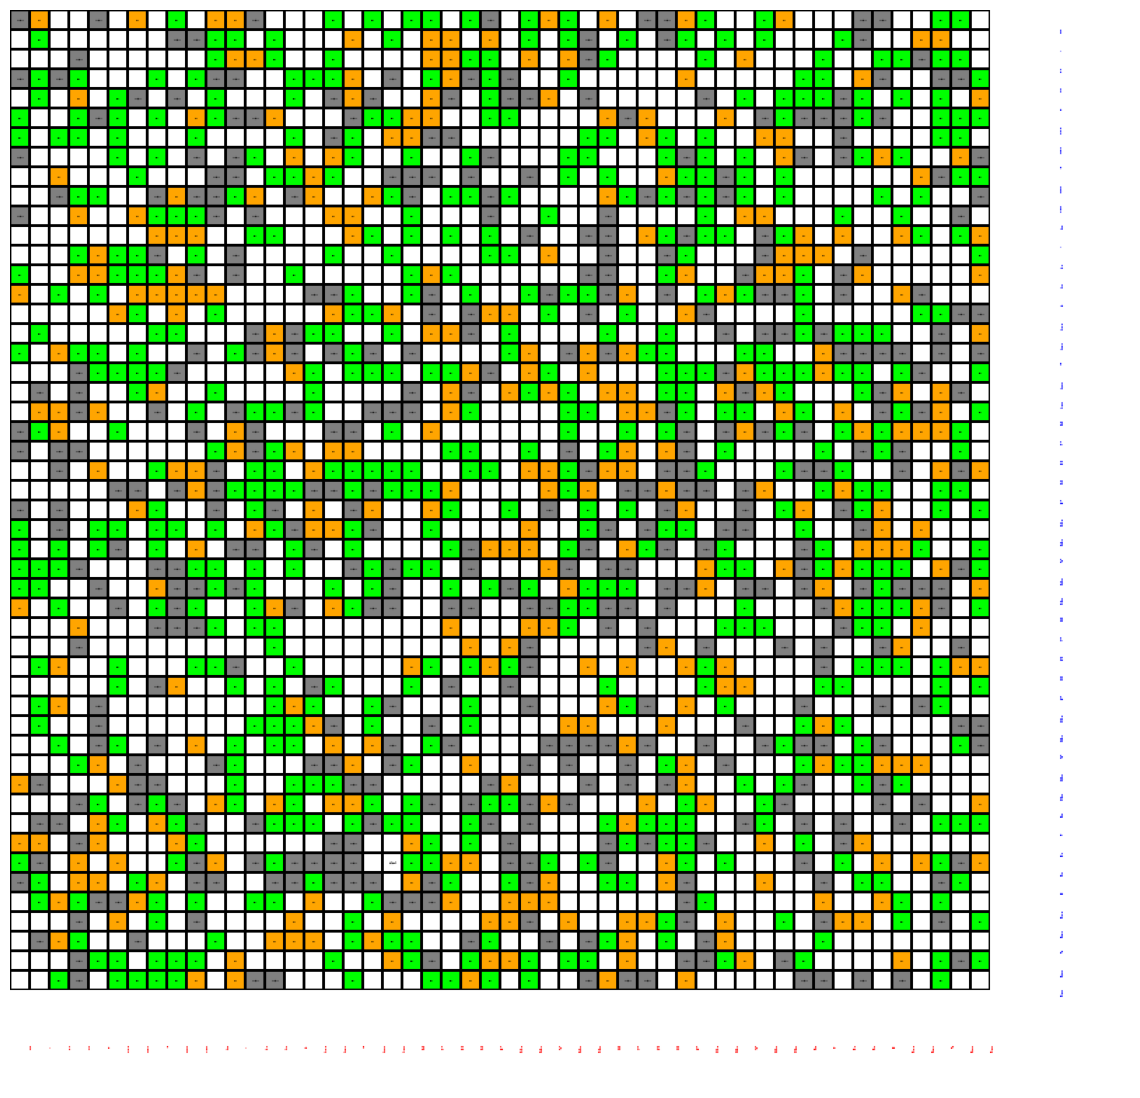

# Maze size
MAZE_WIDTH  = 50
MAZE_HEIGHT = 50

# Starting position
START_POS = (19, 43)

# Green squares  — Count: 559
# Brown squares  — Count: 322
# Wall locations — Count: 422
# White squares  — Count: 1197


In [23]:
# set the figure size
plt.figure(figsize=(16, 14))

# visualize the environment of medium complex maze
set_maze_type('maze_50x50')
visualize_env('maze_50x50_env')

# calculate the number of white squares
total_cells = maze_50x50.MAZE_WIDTH * maze_50x50.MAZE_HEIGHT
num_white = total_cells - len(maze_50x50.GRN_SQ) - len(maze_50x50.BRN_SQ) - len(maze_50x50.WALL)

# display the maze details
print(f"# Maze size\nMAZE_WIDTH  = {maze_50x50.MAZE_WIDTH}\nMAZE_HEIGHT = {maze_50x50.MAZE_HEIGHT}\n")
print(f"# Starting position\nSTART_POS = {maze_50x50.START_POS}\n")
print(f"# Green squares  — Count: {len(maze_50x50.GRN_SQ)}")
print(f"# Brown squares  — Count: {len(maze_50x50.BRN_SQ)}")
print(f"# Wall locations — Count: {len(maze_50x50.WALL)}")
print(f"# White squares  — Count: {num_white}")

## 3.1 `Value Iteration`

### Run the Value Iteration algorithm
- Get the number of iterations and time taken to converge

In [24]:
start_time = time.time()                                                # start timing
vi_env = init_vi_env()                                                  # initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env, '50x50_vi_results') # perform value iteration
vi_policy = generate_policy(vi_env)                                     # generate the optimal policy

end_time     = time.time()
elapsed_time = end_time - start_time                                    # calculate elapsed time

vi_cnt_3  = vi_iterations_cnt
vi_time_3 = elapsed_time

print(f'Value iteration converged in {vi_cnt_3} iterations')
print(f'Time taken for convergence: {vi_time_3:.4f} seconds')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')

Value iteration converged in 1145 iterations
Time taken for convergence: 32.6772 seconds


### Display the optimal Value Iteration policy

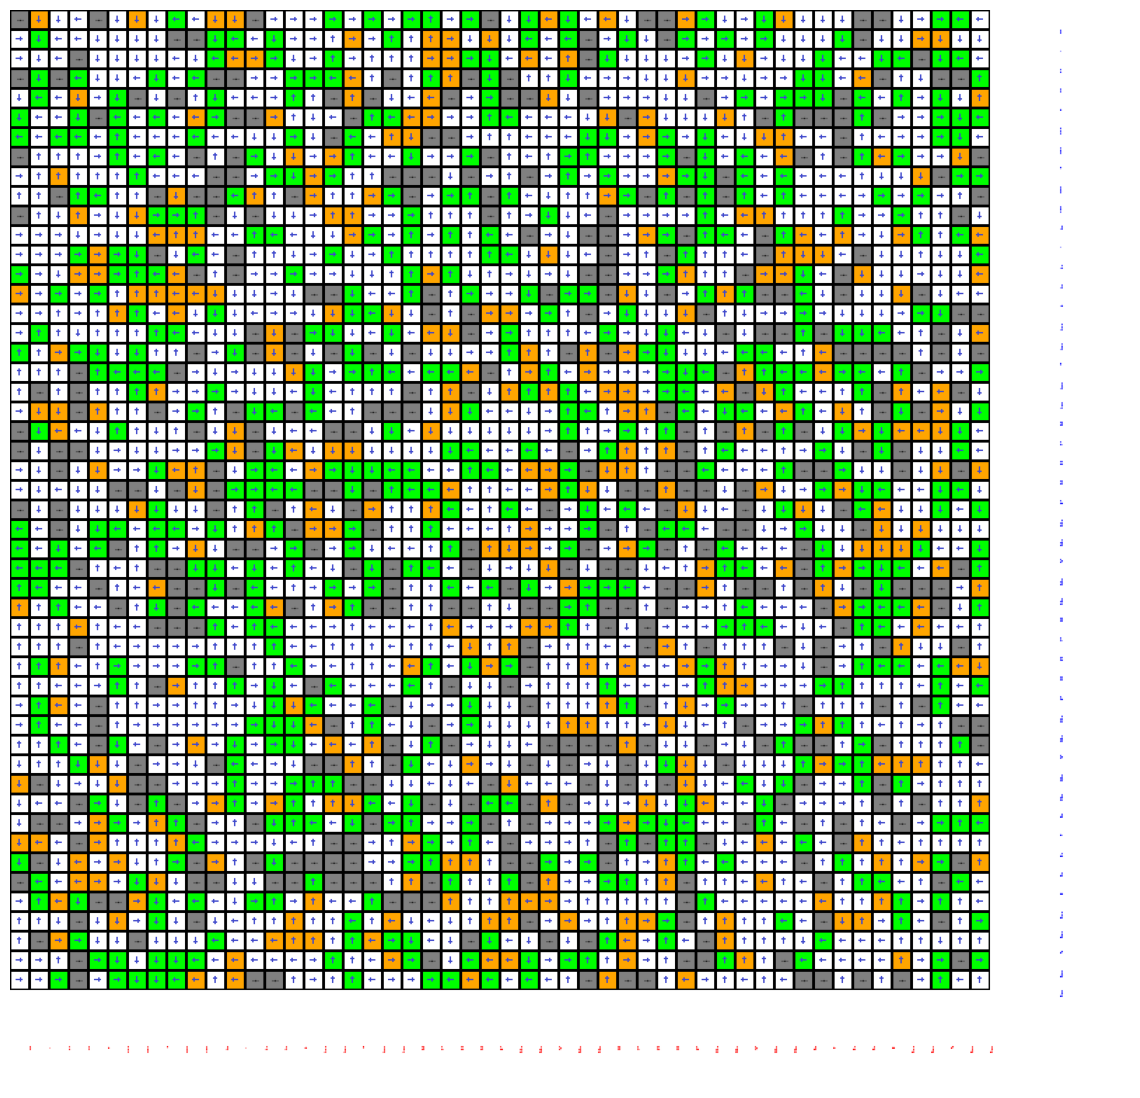

In [25]:
# set the figure size
plt.figure(figsize=(18, 14))

# display the optimal value iteration policy
visualize_policy(vi_policy, '50x50_value_iteration_policy')

### Display the Value Iteration utilities of all the states

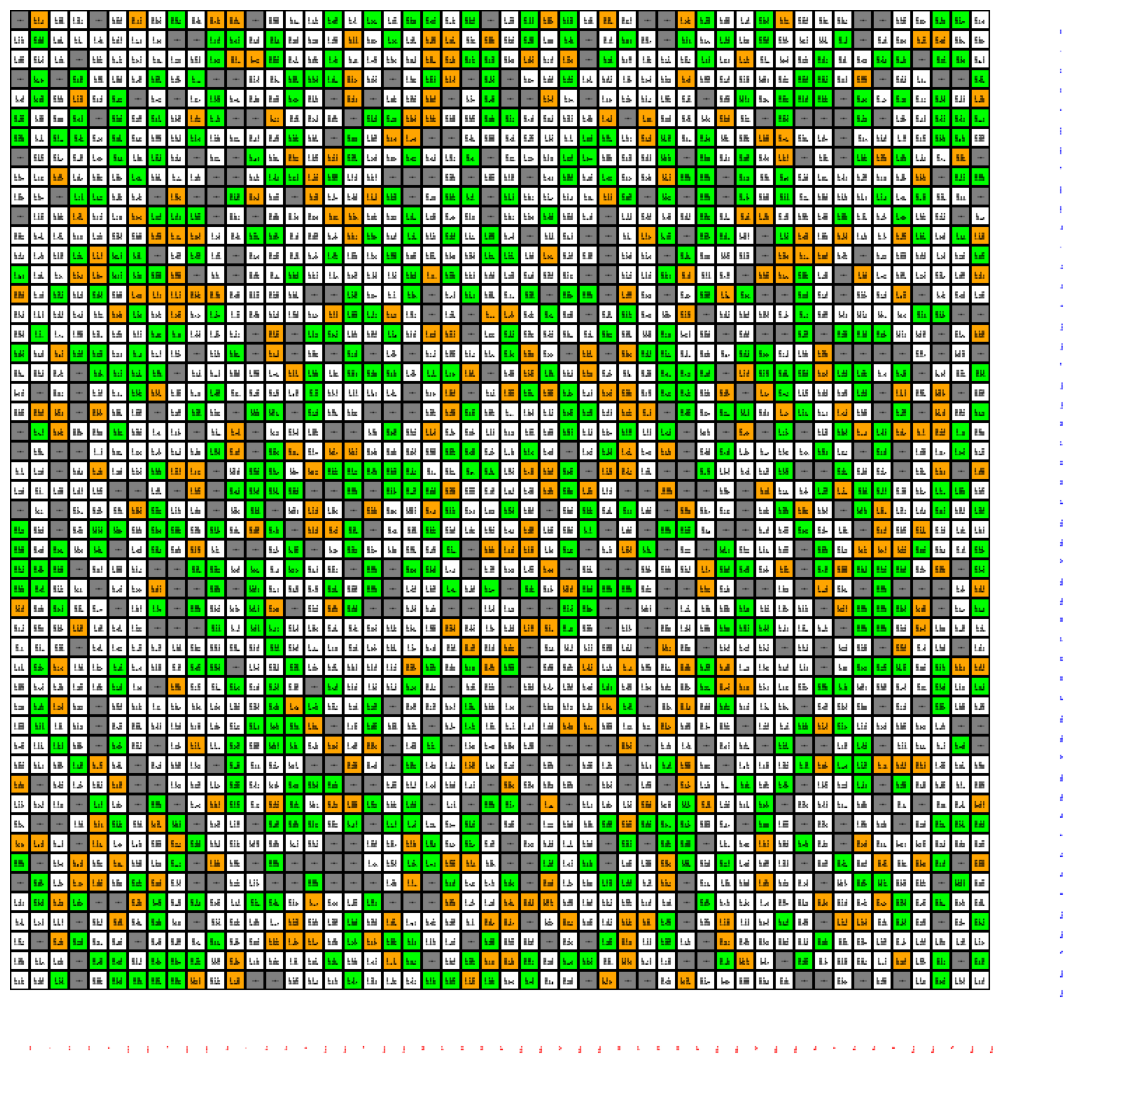

In [26]:
# set the figure size
plt.figure(figsize=(18, 14))

# display the value iteration utilities of all the values
visualize_utility(vi_env, '50x50_value_iteration_utility')

### Plot Value Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

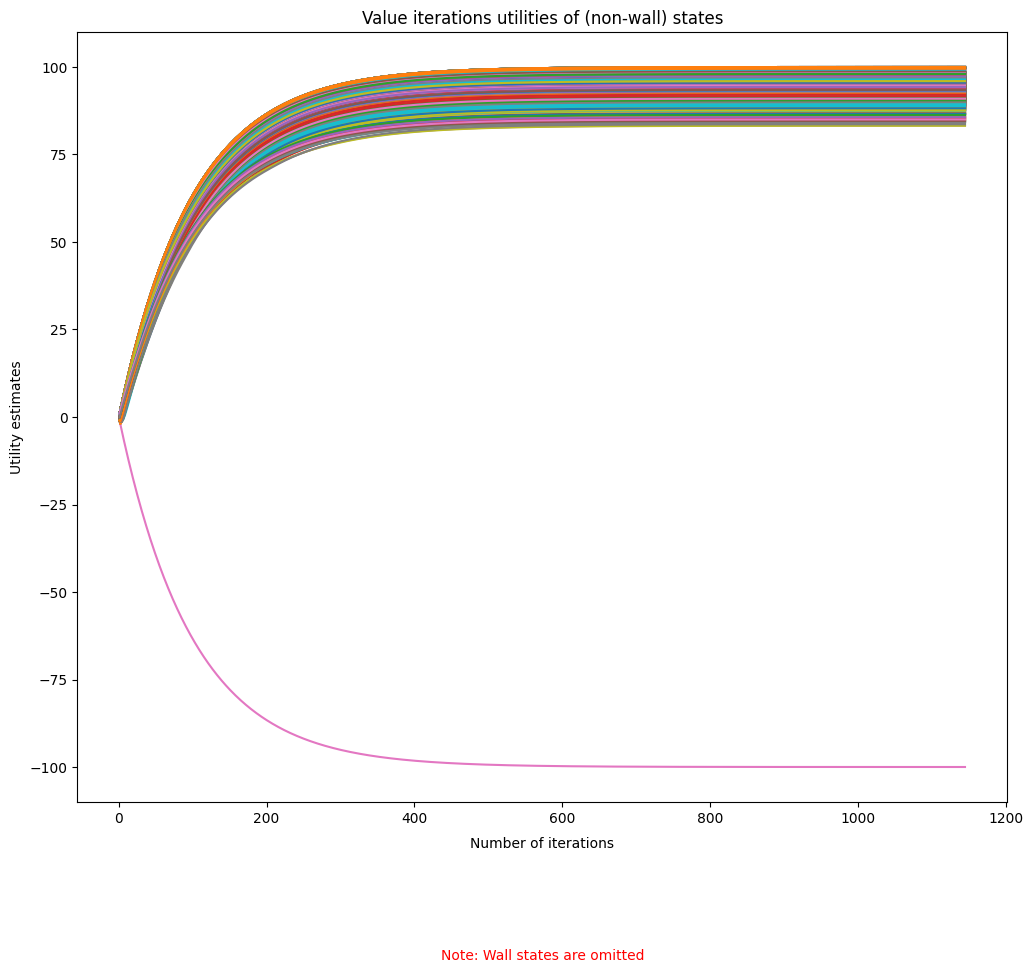

In [27]:
# set the figure size
plt.figure(figsize=(12, 10))

# load results
vi_results = pd.read_csv(get_path() + '/result/value_iteration/50x50_vi_results.csv')

# group by states (x, y)
groups = vi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Value iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# show plot
plt.show()

### Value Iteration Observation
- Comparing given maze, 10x10 maze, and 50x50 maze

In [28]:
# given maze results
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze')
print(f'- Value iteration converged in {vi_cnt_1} iterations')
print(f'- Time taken for convergence: {vi_time_1:.4f} seconds\n')

# 10x10 maze results
print(f'10x10 maze algorithm running results:')
print(f'- There are 100 states in the maze')
print(f'- Value iteration converged in {vi_cnt_2} iterations')
print(f'- Time taken for convergence: {vi_time_2:.4f} seconds\n')

# 50x50 maze results
print(f'50x50 maze algorithm running results:')
print(f'- There are 2,500 states in the maze')
print(f'- Value iteration converged in {vi_cnt_3} iterations')
print(f'- Time taken for convergence: {vi_time_3:.4f} seconds\n')

# amplitude
print(f'Amplitude of 10x10_time_2 over given_time_1 is {vi_time_2 / vi_time_1:.2f}')
print(f'Amplitude of 50x50_time_3 over 10x10_time_2 is {vi_time_3 / vi_time_2:.2f}')
print(f'Amplitude of 50x50_time_3 over given_time_1 is {vi_time_3 / vi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 0.7206 seconds

10x10 maze algorithm running results:
- There are 100 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 1.2521 seconds

50x50 maze algorithm running results:
- There are 2,500 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 32.6772 seconds

Amplitude of 10x10_time_2 over given_time_1 is 1.74
Amplitude of 50x50_time_3 over 10x10_time_2 is 26.10
Amplitude of 50x50_time_3 over given_time_1 is 45.35


### __Value Iteration Observations__
- The number of iterations for convergence is identical across all three maze sizes.

- The convergence time for the 50x50 maze is over 20 times longer than that of the 10x10 maze.

- The convergence time for the 50x50 maze is over 40 times longer than that of the given maze.

## 3.2 `Policy Iteration`

### Run the Policy Iteration algorithm
- get the number of iterations and time taken to converge

In [29]:
start_time = time.time()                                                                        # start timing
pi_env, pi_policy = init_pi_env()                                                               # initialize the environment
pi_env, pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy, '50x50_pi_results')  # perform policy iteration

end_time     = time.time()
elapsed_time = end_time - start_time                                                            # calculate elapsed time

pi_cnt_3  = pi_iterations_cnt
pi_time_3 = elapsed_time

print(f'\nPolicy iteration converged in {pi_cnt_3} iterations')
print(f'Time taken for convergence: {pi_time_3:.4f} seconds\n')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')


Policy iteration converged in 12 iterations
Time taken for convergence: 31.4488 seconds



### Display the optimal Policy Iteration policy

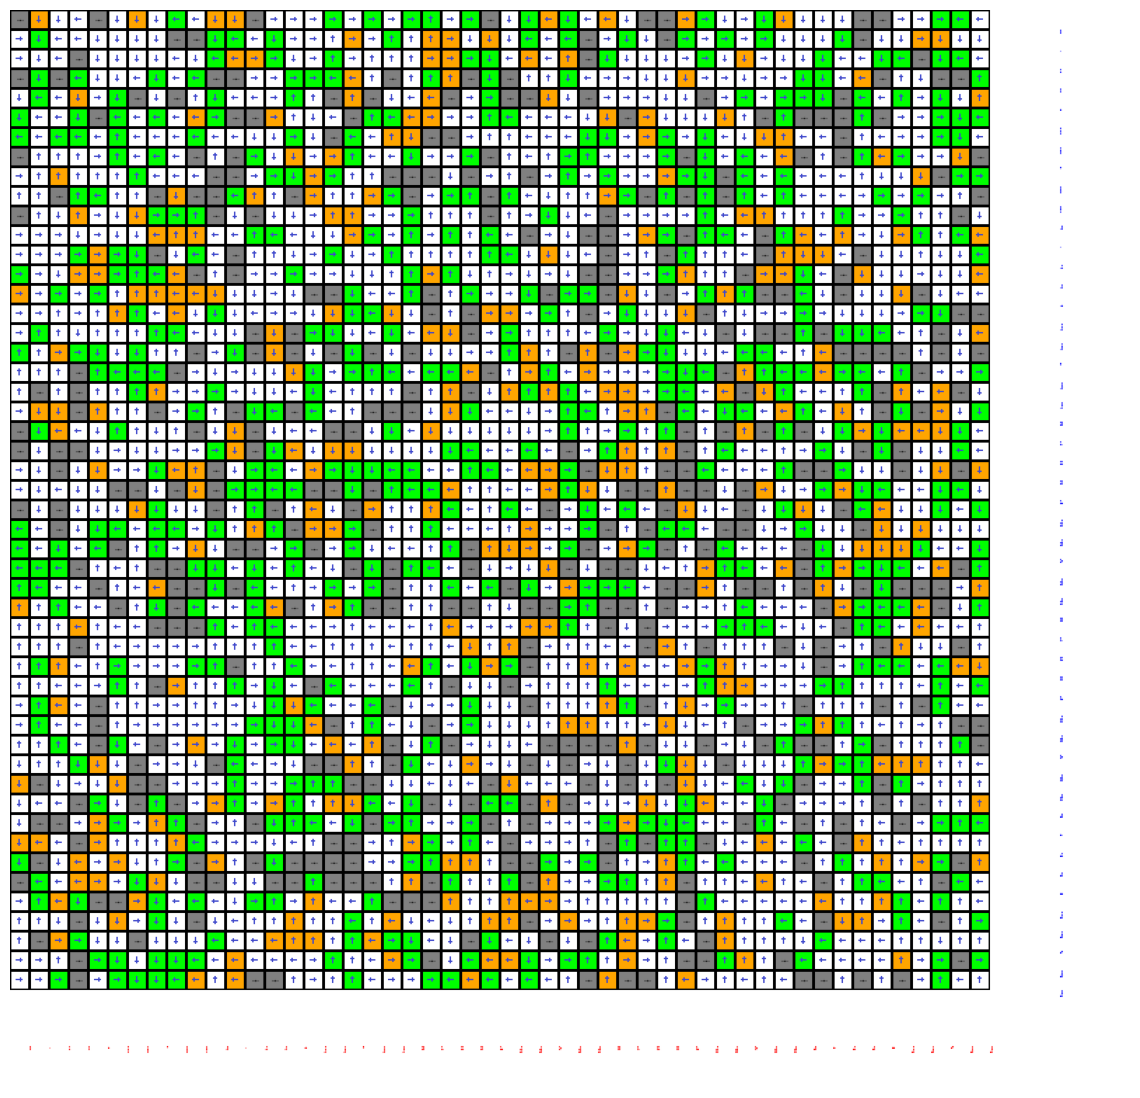

In [30]:
# set the figure size
plt.figure(figsize=(18, 14))

# visualize the optimal policy iteration policy
visualize_policy(pi_policy, '50x50_policy_iteration_policy')

### Display the Policy Iteration utilities of all the states

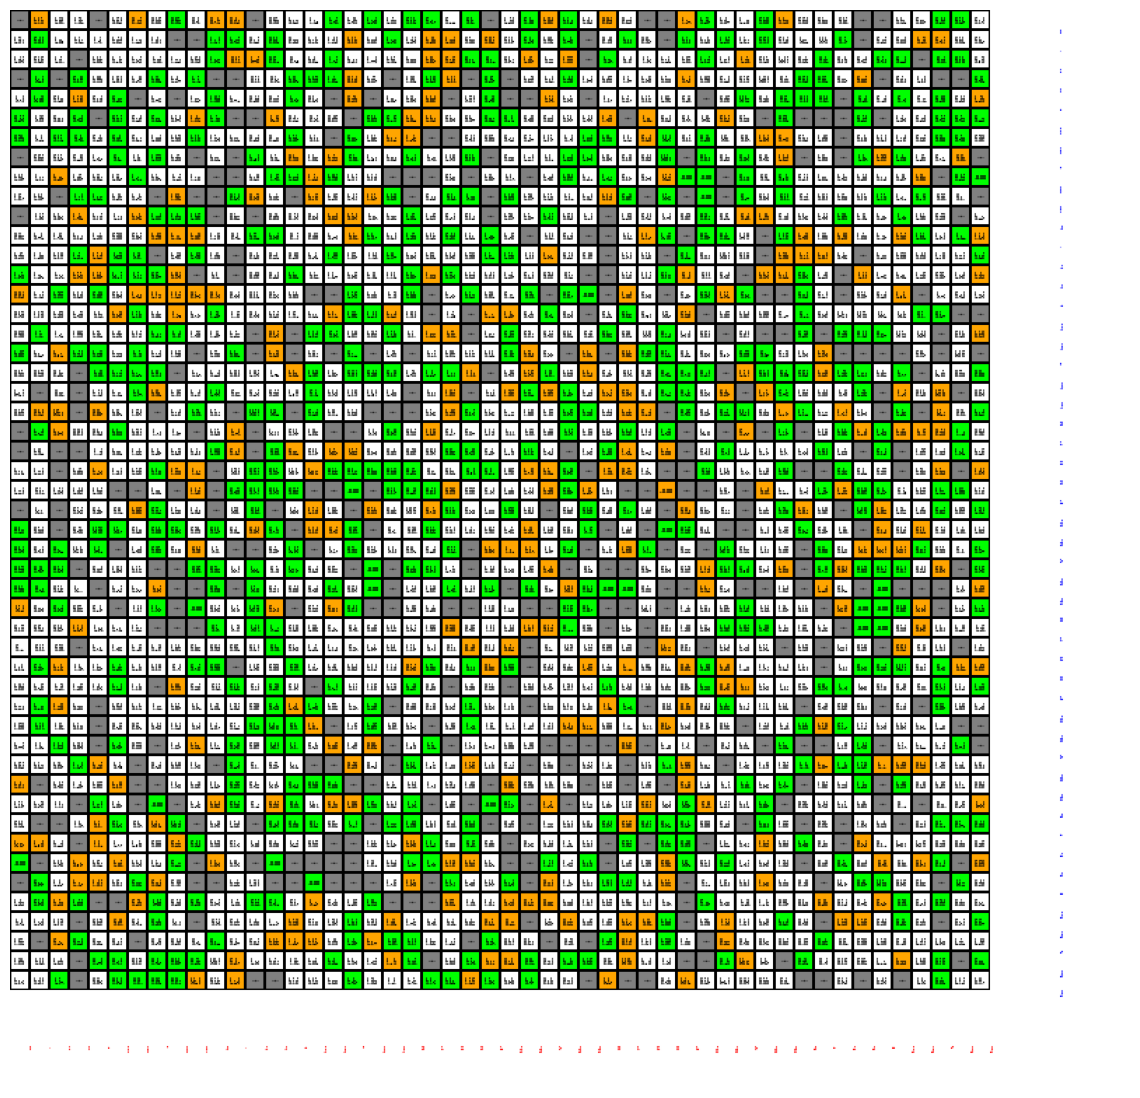

In [31]:
# set the figure size
plt.figure(figsize=(18, 14))

# visualize the utility values
visualize_utility(pi_env, '50x50_policy_iteration_utility')

### Plot Policy Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

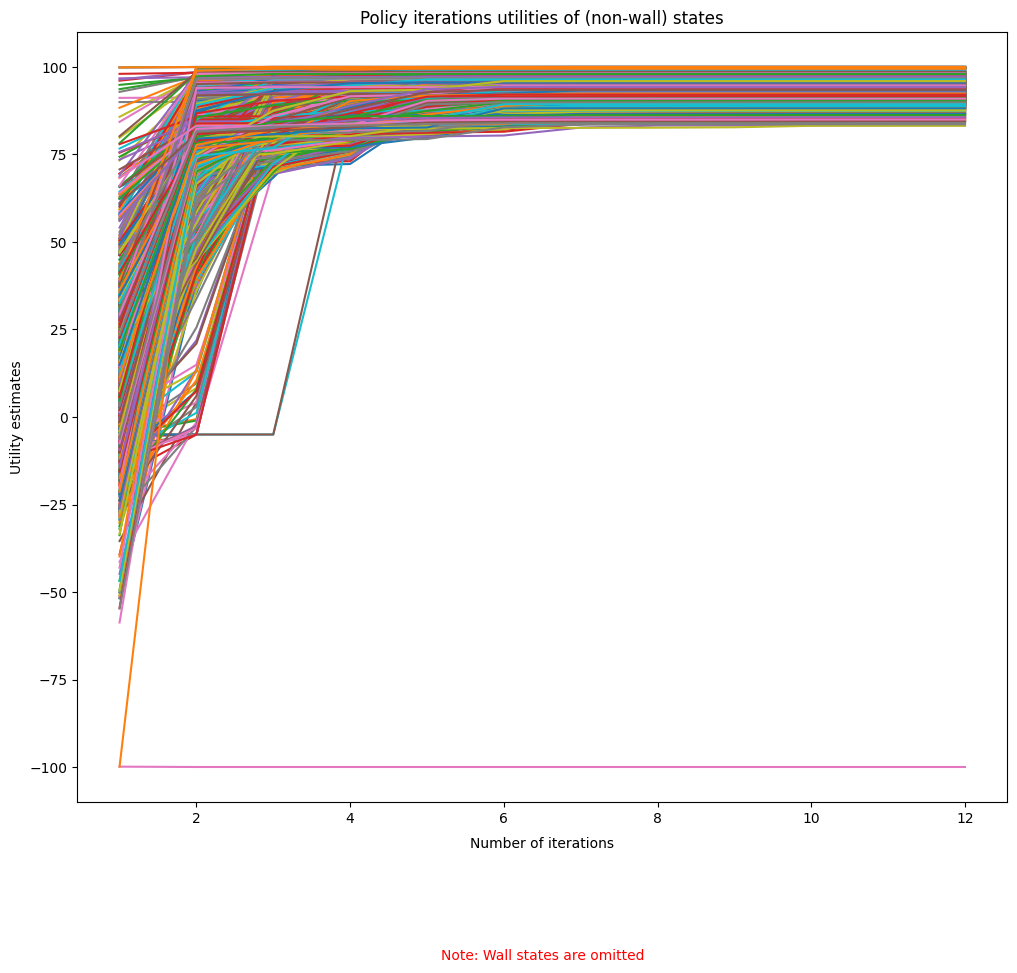

In [32]:
# set the figure size
plt.figure(figsize=(12, 10))

# load results
pi_results = pd.read_csv(get_path() + f'/result/policy_iteration/50x50_pi_results.csv')

# group by states (x, y)
groups = pi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Policy iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# show plot
plt.show()

### Policy Iteration Observation
- Comparing given maze, 10x10 maze, and 50x50 maze

In [33]:
# given maze results
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_1} iterations')
print(f'- Time taken for convergence: {pi_time_1:.4f} seconds\n')

# 10x10 maze results
print(f'10x10 maze algorithm running results:')
print(f'- There are 100 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_2} iterations')
print(f'- Time taken for convergence: {pi_time_2:.4f} seconds\n')

# 50x50 maze results
print(f'50x50 maze algorithm running results:')
print(f'- There are 2,500 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_3} iterations')
print(f'- Time taken for convergence: {pi_time_3:.4f} seconds\n')

# amplitude
print(f'Amplitude of 10x10_time_2 over given_time_1 is {pi_time_2 / pi_time_1:.2f}')
print(f'Amplitude of 50x50_time_3 over 10x10_time_2 is {pi_time_3 / pi_time_2:.2f}')
print(f'Amplitude of 50x50_time_3 over given_time_1 is {pi_time_3 / pi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze
- Policy iteration converged in 6 iterations
- Time taken for convergence: 0.1769 seconds

10x10 maze algorithm running results:
- There are 100 states in the maze
- Policy iteration converged in 9 iterations
- Time taken for convergence: 1.0036 seconds

50x50 maze algorithm running results:
- There are 2,500 states in the maze
- Policy iteration converged in 12 iterations
- Time taken for convergence: 31.4488 seconds

Amplitude of 10x10_time_2 over given_time_1 is 5.67
Amplitude of 50x50_time_3 over 10x10_time_2 is 31.34
Amplitude of 50x50_time_3 over given_time_1 is 177.83


### __Policy Iterations Observations__
- The number of iterations for convergence grows as the number of states increases.

- The convergence time for the 50x50 maze is over 20 times longer than that of the 10x10 maze.

- The convergence time for the 50x50 maze is over 100 times longer than that of the given maze.

# Part 4 - Testing with more complex maze environment

## Complex Maze Environment Characteristics: 
####
•	A larger number of states within the maze.
•	An increased wall-to-state ratio, indicating obstacle density.

To identify a suitable complex maze for testing, I performed experiments with various maze sizes and obstacle densities using policy iteration. The time limit for each experiment was capped at **60 minutes** — any maze taking longer was stopped, and the time was recorded as **> 60 min**. The results are as follows:

| Maze Size    | Obstacle Density | Time Taken        |
|--------------|------------------|------------------:|
| 50x50 maze   | 50%-60%          | 29.1262 sec       |
| 50x50 maze   | 60%-70%          | 21.6624 sec       |
| 60x60 maze   | 50%-60%          | 3 min 24.32 sec   |
| 70x70 maze   | 50%-60%          | 4 min 32.43 sec   |
| 80x80 maze   | 40%-50%          | > 60 min          |
| 80x80 maze   | 50%-60%          | > 60 min          |
| 90x90 maze   | 40%-50%          | > 60 min          |
| 90x90 maze   | 50%-60%          | > 60 min          |
| 100x100 maze | 50%-60%          | > 60 min          |

Based on these findings, I selected the **70x70 maze with a 50%-60% obstacle density** for further testing. It represented the largest maze with the highest density of obstacles that could be completed within the 60-minute benchmark.





## Generate a 70x70 maze with random configurations
#### (Using a random seed for reproducible results)

### Display the 70x70 maze environment

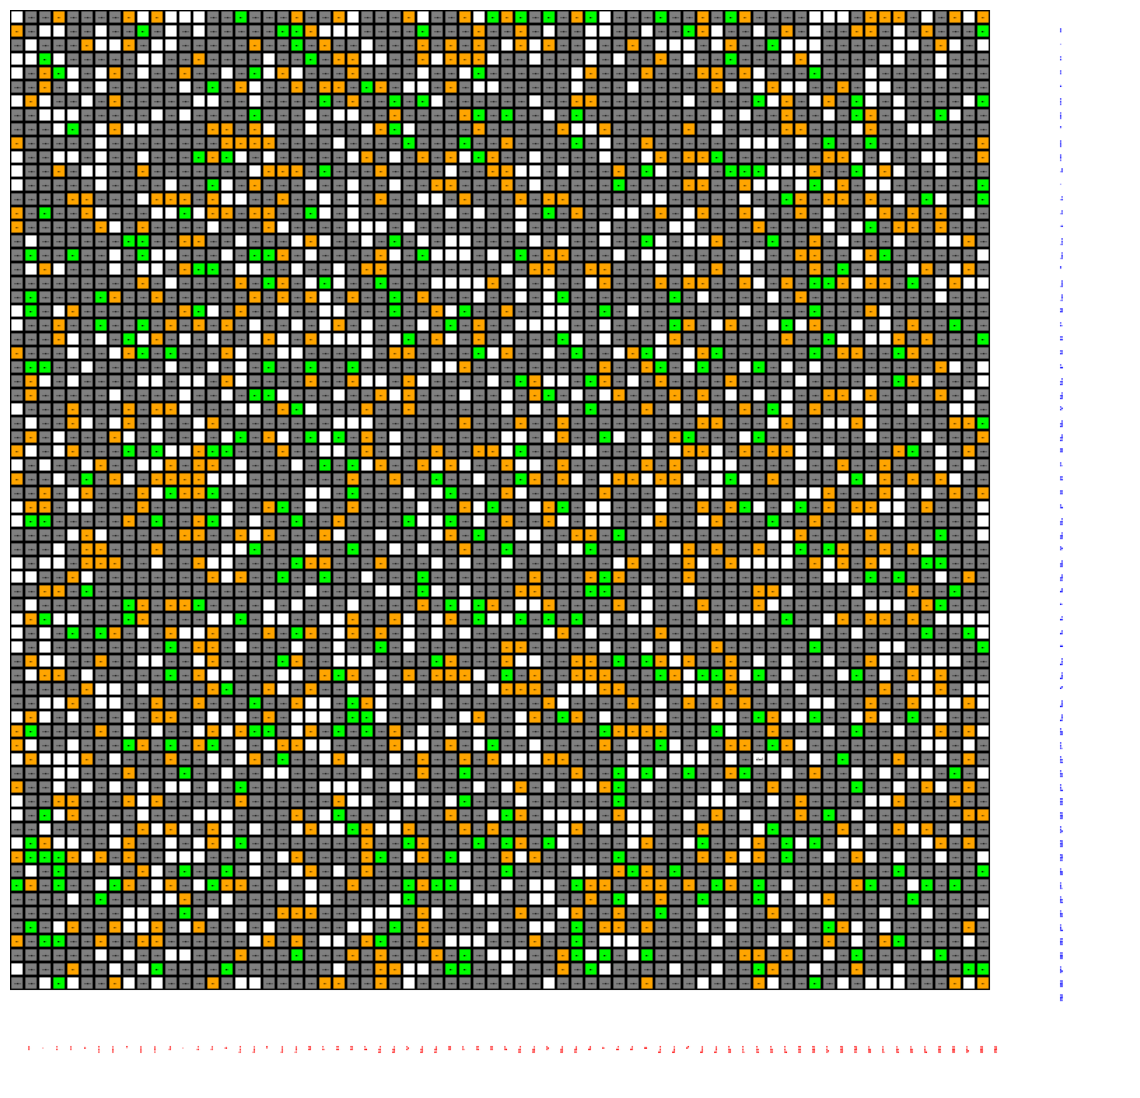

# Maze size
MAZE_WIDTH  = 70
MAZE_HEIGHT = 70

# Starting position
START_POS = (53, 53)

# Green squares  — Count: 342
# Brown squares  — Count: 702
# Wall locations — Count: 2809 (57.3)%
# White squares  — Count: 1047


In [34]:
# set the figure size
plt.figure(figsize=(16, 14))

# visualize the environment of medium complex maze
set_maze_type('maze_70x70')
visualize_env('maze_70x70_env')

# calculate the number of white squares
total_cells = maze_70x70.MAZE_WIDTH * maze_70x70.MAZE_HEIGHT
num_white = total_cells - len(maze_70x70.GRN_SQ) - len(maze_70x70.BRN_SQ) - len(maze_70x70.WALL)

# display the maze details
print(f"# Maze size\nMAZE_WIDTH  = {maze_70x70.MAZE_WIDTH}\nMAZE_HEIGHT = {maze_70x70.MAZE_HEIGHT}\n")
print(f"# Starting position\nSTART_POS = {maze_70x70.START_POS}\n")
print(f"# Green squares  — Count: {len(maze_70x70.GRN_SQ)}")
print(f"# Brown squares  — Count: {len(maze_70x70.BRN_SQ)}")
print(f"# Wall locations — Count: {len(maze_70x70.WALL)} ({len(maze_70x70.WALL) / total_cells * 100:.1f})%")
print(f"# White squares  — Count: {num_white}")

## 4.1 `Value Iteration`

### Run the Value Iteration algorithm
- Get the number of iterations and time taken to converge

In [35]:
start_time = time.time()                                                  # start timing
vi_env = init_vi_env()                                                    # initialize the environment
vi_env, vi_iterations_cnt = value_iteration(vi_env, '70x70_vi_results')   # perform value iteration
vi_policy = generate_policy(vi_env)                                       # generate the optimal policy

end_time     = time.time()
elapsed_time = end_time - start_time                                      # calculate elapsed time

vi_cnt_4  = vi_iterations_cnt
vi_time_4 = elapsed_time

print(f'Value iteration converged in {vi_cnt_4} iterations')
print(f'Time taken for convergence: {vi_time_4:.4f} seconds\n')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')

Value iteration converged in 1145 iterations
Time taken for convergence: 62.7827 seconds

Time taken for convergence: 1 min 2.78 sec


### Display the optimal Value Iteration policy

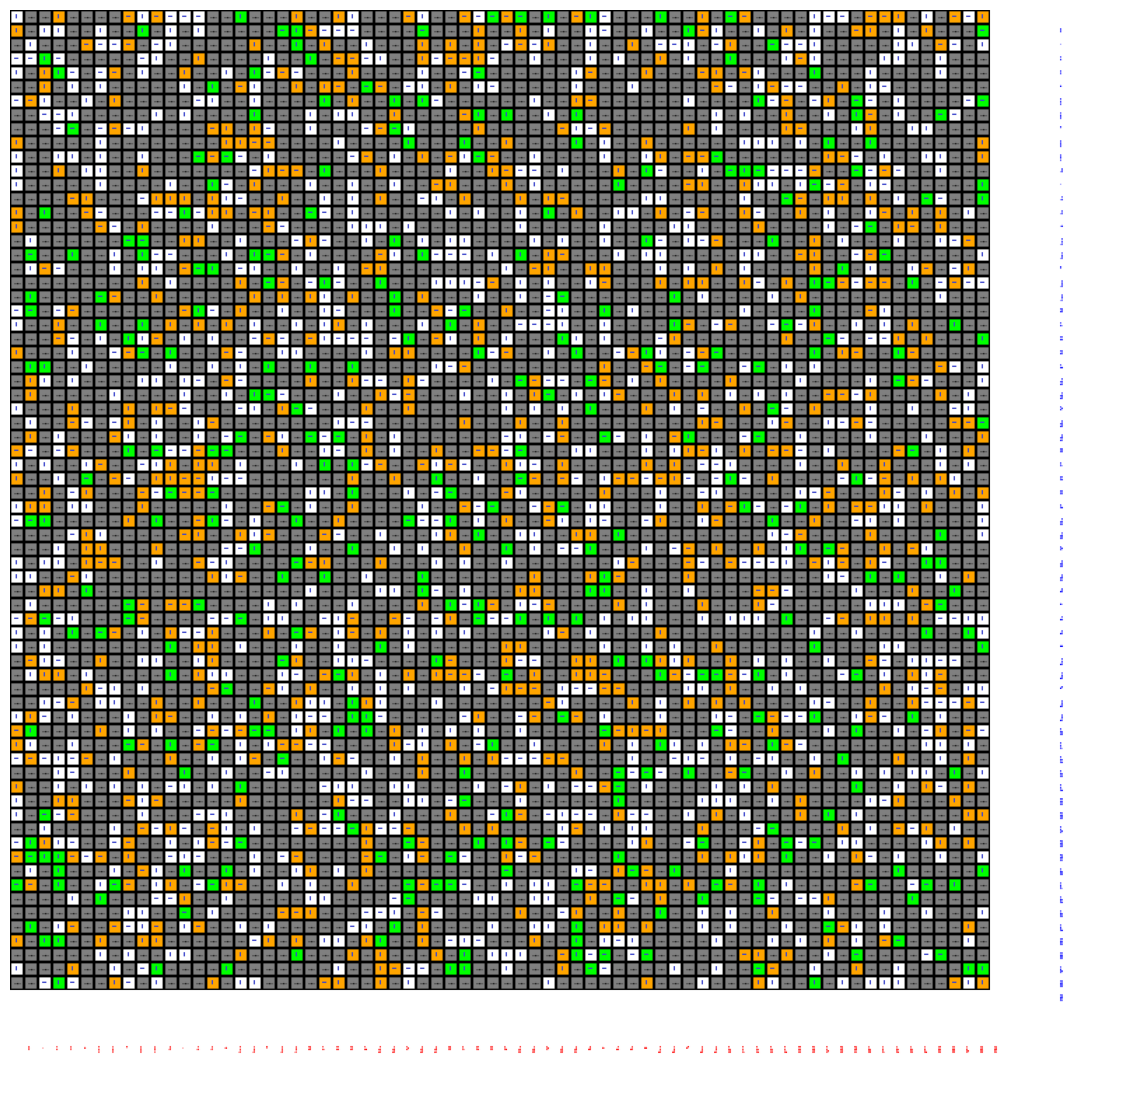

In [36]:
# set the figure size
plt.figure(figsize=(18, 14))

# display the optimal value iteration policy
visualize_policy(vi_policy, '70x70_value_iteration_policy')

### Display the Value Iteration utilities of all the states

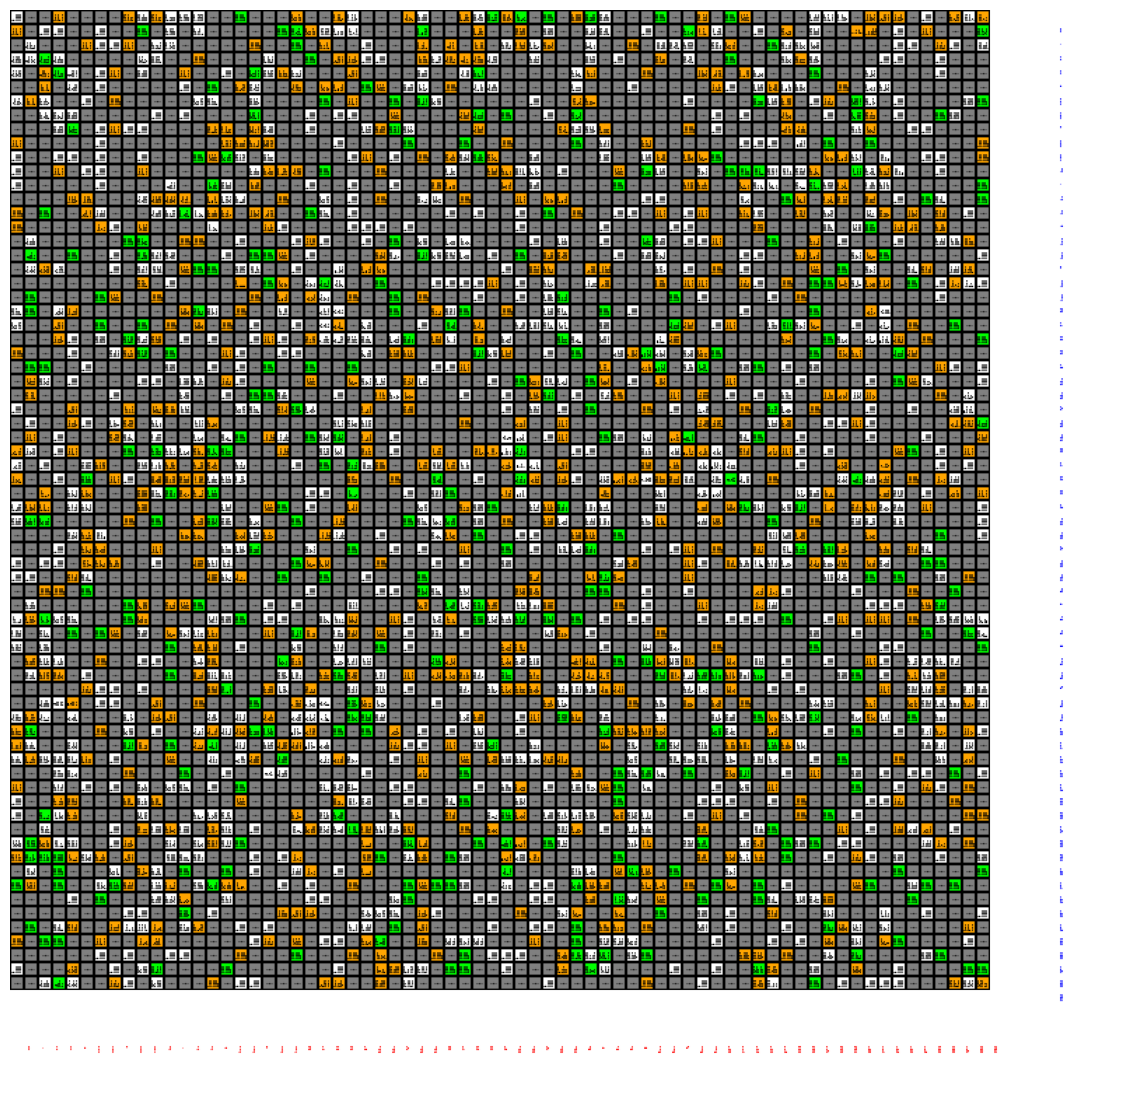

In [37]:
# set the figure size
plt.figure(figsize=(18, 14))

# display the value iteration utilities of all the values
visualize_utility(vi_env, '70x70_value_iteration_utility')

### Plot Value Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

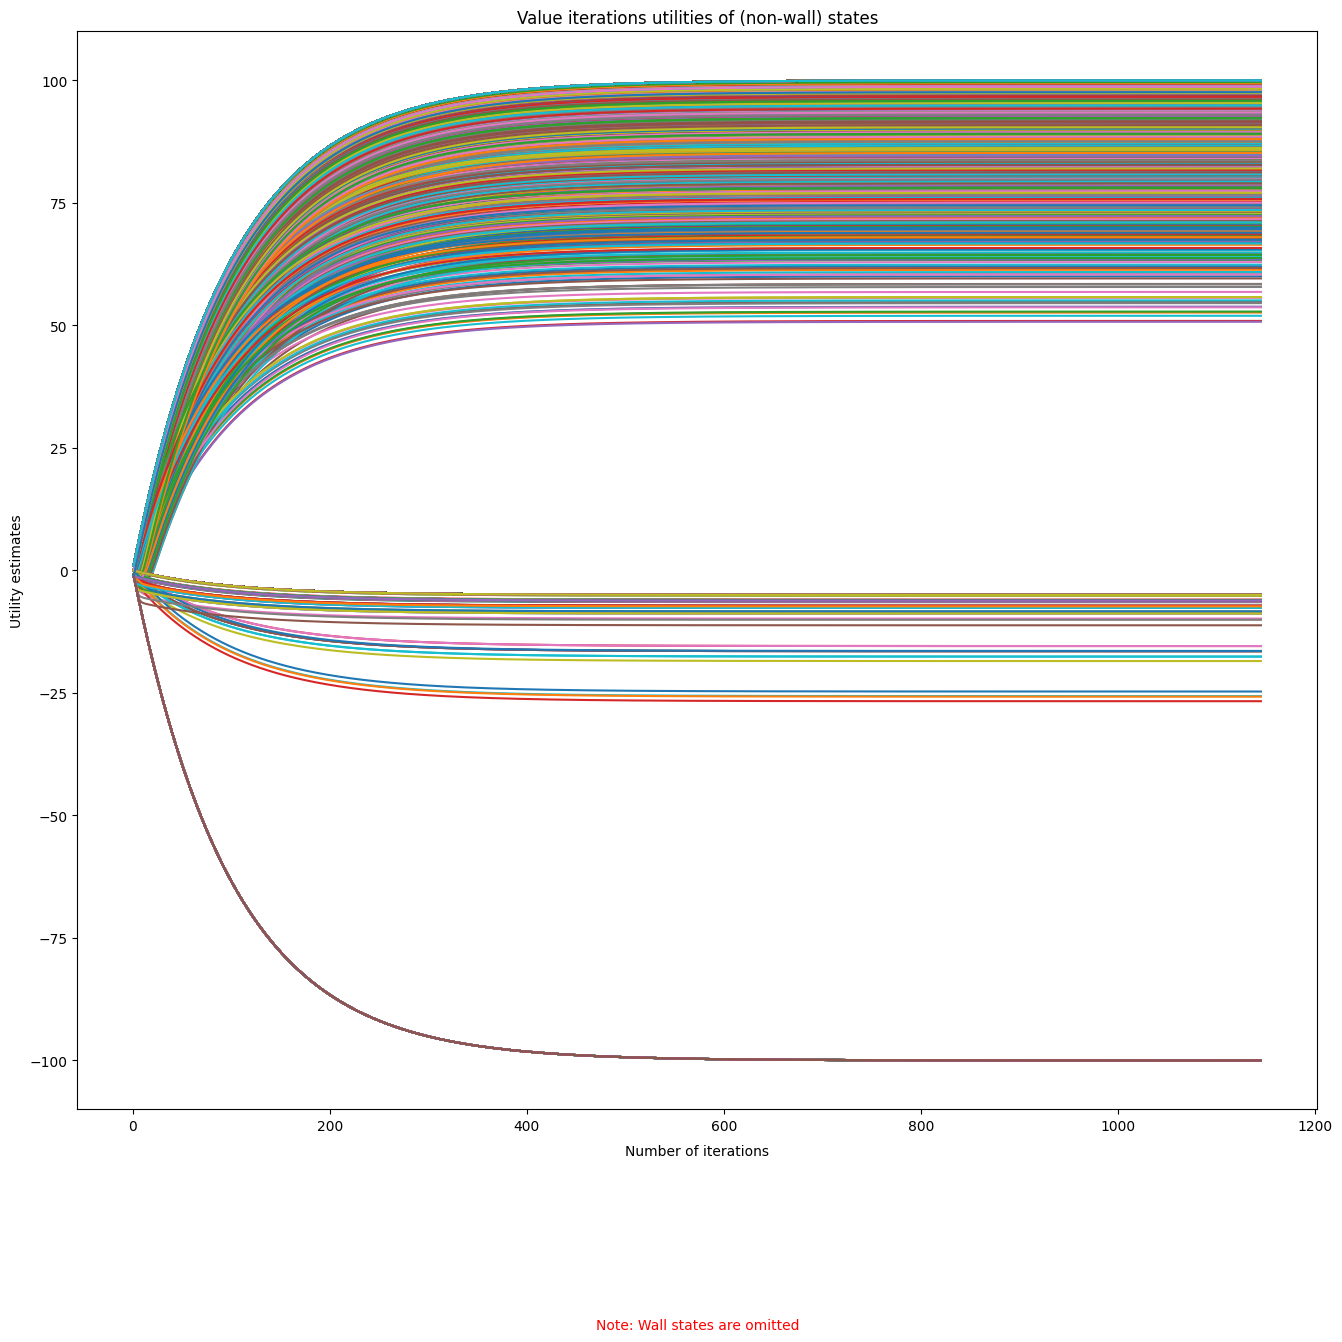

In [38]:
# set the figure size
plt.figure(figsize=(16, 14))

# load results
vi_results = pd.read_csv(get_path() + '/result/value_iteration/70x70_vi_results.csv')

# group by states (x, y)
groups = vi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Value iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# show plot
plt.show()

### Value Iteration Observation
- Comparing given maze, 10x10 maze, 50x50 maze, and 70x70 maze

In [39]:
# given maze results
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze')
print(f'- Value iteration converged in {vi_cnt_1} iterations')
print(f'- Time taken for convergence: {vi_time_1:.4f} seconds\n')

# 10x10 maze results
print(f'10x10 maze algorithm running results:')
print(f'- There are 100 states in the maze')
print(f'- Value iteration converged in {vi_cnt_2} iterations')
print(f'- Time taken for convergence: {vi_time_2:.4f} seconds\n')

# 50x50 maze results
print(f'50x50 maze algorithm running results:')
print(f'- There are 2,500 states in the maze')
print(f'- Value iteration converged in {vi_cnt_3} iterations')
print(f'- Time taken for convergence: {vi_time_3:.4f} seconds\n')

# 50x50 maze results
print(f'70x70 maze algorithm running results:')
print(f'- There are 4,900 states in the maze')
print(f'- Value iteration converged in {vi_cnt_4} iterations')
print(f'- Time taken for convergence: {vi_time_4:.4f} seconds\n')

# amplitude
print(f'Amplitude of 10x10_time_2 over given_time_1 is {vi_time_2 / vi_time_1:.2f}')
print(f'Amplitude of 50x50_time_3 over 10x10_time_2 is {vi_time_3 / vi_time_2:.2f}')
print(f'Amplitude of 50x50_time_3 over given_time_1 is {vi_time_3 / vi_time_1:.2f}')
print(f'Amplitude of 70x70_time_4 over 50x50_time_3 is {vi_time_4 / vi_time_3:.2f}')
print(f'Amplitude of 70x70_time_4 over 10x10_time_2 is {vi_time_4 / vi_time_2:.2f}')
print(f'Amplitude of 70x70_time_4 over given_time_1 is {vi_time_4 / vi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 0.7206 seconds

10x10 maze algorithm running results:
- There are 100 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 1.2521 seconds

50x50 maze algorithm running results:
- There are 2,500 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 32.6772 seconds

70x70 maze algorithm running results:
- There are 4,900 states in the maze
- Value iteration converged in 1145 iterations
- Time taken for convergence: 62.7827 seconds

Amplitude of 10x10_time_2 over given_time_1 is 1.74
Amplitude of 50x50_time_3 over 10x10_time_2 is 26.10
Amplitude of 50x50_time_3 over given_time_1 is 45.35
Amplitude of 70x70_time_4 over 50x50_time_3 is 1.92
Amplitude of 70x70_time_4 over 10x10_time_2 is 50.14
Amplitude of 70x70_time_4 over given_time_1 is 87.13


### __Value Iterations Observations__
- The number of iterations for convergence is identical across all four maze sizes.

- The convergence time for the 70x70 maze is almost twice longer than that of the 50x50 maze.

- The convergence time for the 70x70 maze is over 40 times longer than that of the 10x10 maze.

- The convergence time for the 70x70 maze is over 80 times longer than that of the given maze.

## 4.2 `Policy Iteration`

### Run the Policy Iteration algorithm
- get the number of iterations and time taken to converge

In [40]:
start_time = time.time()                                                                          # start timing
pi_env, pi_policy = init_pi_env()                                                                 # initialize the environment
pi_env, pi_policy, pi_iterations_cnt = policy_iteration(pi_env, pi_policy, '70x70_pi_results')    # perform policy iteration

end_time     = time.time()
elapsed_time = end_time - start_time                                                              # calculate elapsed time

pi_cnt_4  = pi_iterations_cnt
pi_time_4 = elapsed_time

print(f'\nPolicy iteration converged in {pi_cnt_4} iterations')
print(f'Time taken for convergence: {pi_time_4:.4f} seconds\n')

if elapsed_time >= 60:
    minutes = int(elapsed_time // 60)
    seconds = elapsed_time % 60
    print(f'Time taken for convergence: {minutes} min {seconds:.2f} sec')


Policy iteration converged in 42 iterations
Time taken for convergence: 307.5154 seconds

Time taken for convergence: 5 min 7.52 sec


### Display the optimal Policy Iteration policy

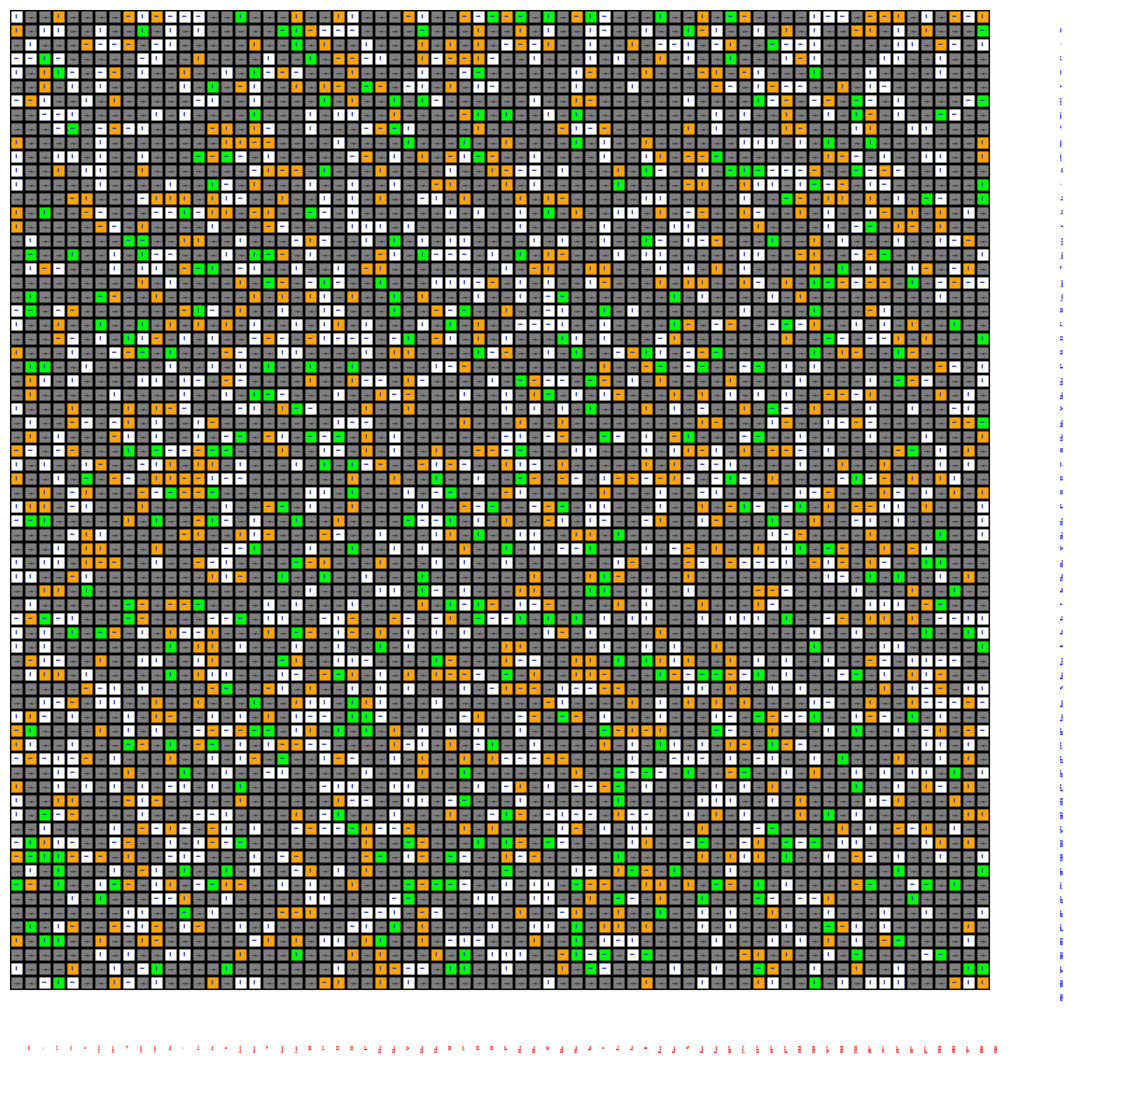

In [41]:
# set the figure size
plt.figure(figsize=(18, 14))

# visualize the optimal policy iteration policy
visualize_policy(pi_policy, '70x70_policy_iteration_policy')

### Display the Policy Iteration utilities of all the states

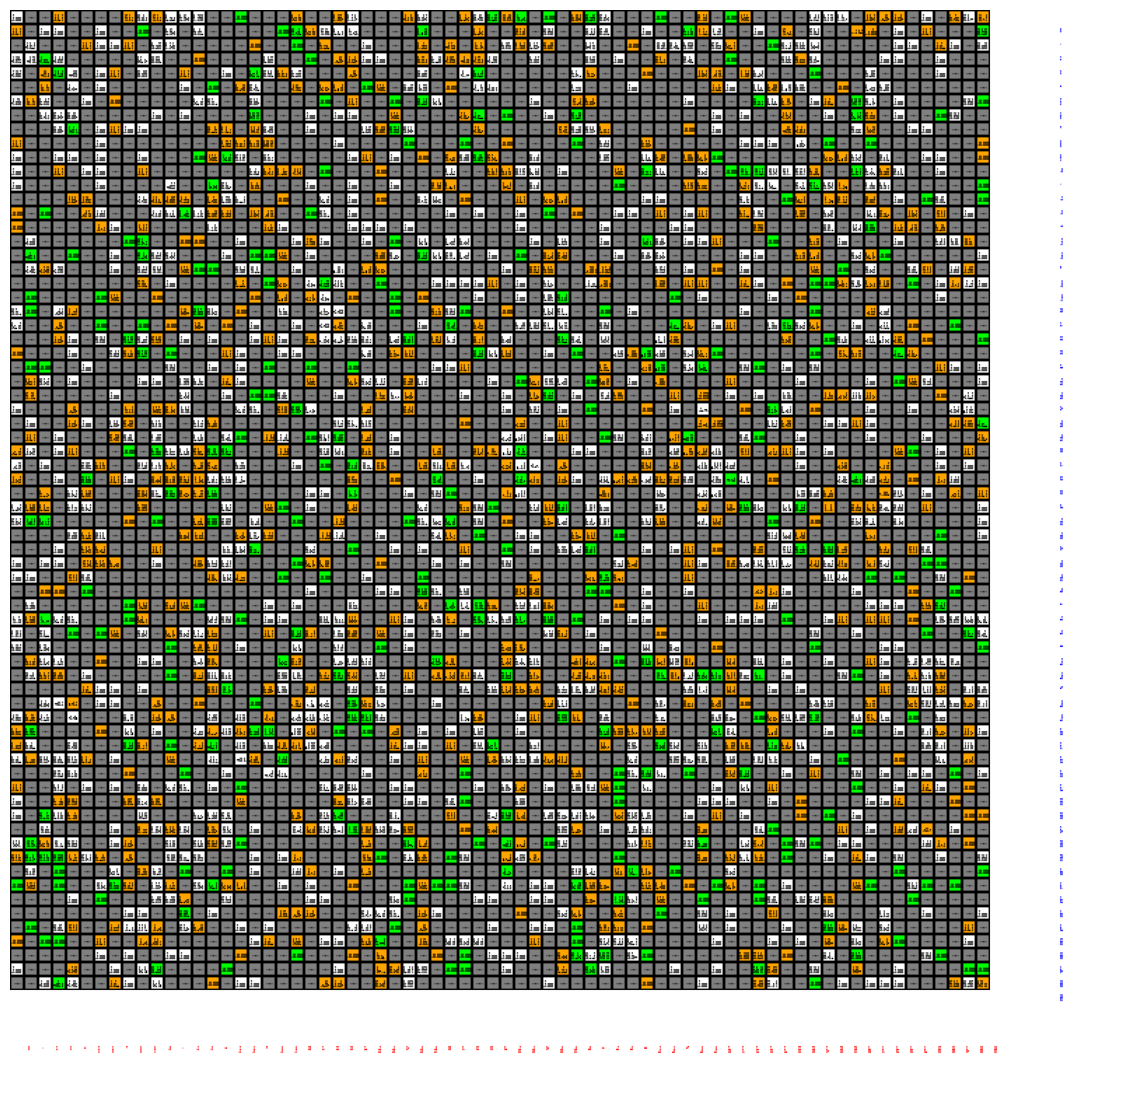

In [42]:
# set the figure size
plt.figure(figsize=(18, 14))

# visualize the utility values
visualize_utility(pi_env, '70x70_policy_iteration_utility')

### Plot Policy Iteration utility estimates as a function of the number of iterations
#### __(Wall omitted)__

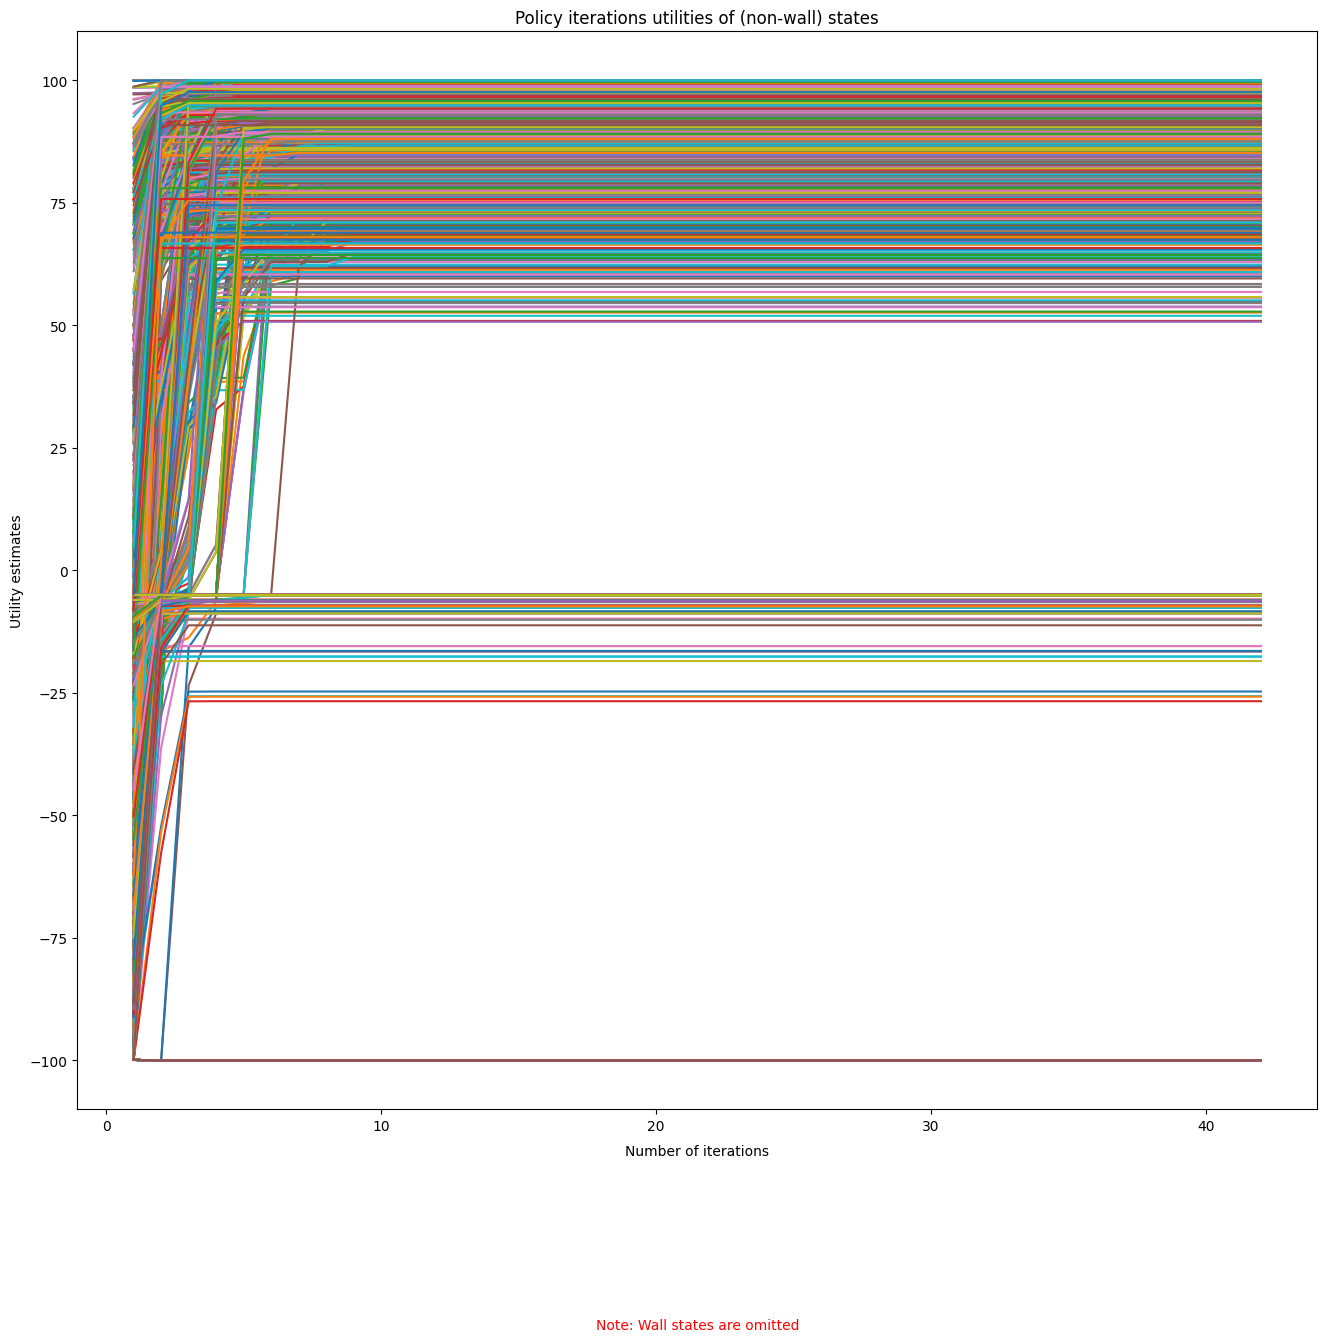

In [43]:
# set the figure size
plt.figure(figsize=(16, 14))

# load results
pi_results = pd.read_csv(get_path() + f'/result/policy_iteration/70x70_pi_results.csv')

# group by states (x, y)
groups = pi_results.groupby(['x', 'y'])

# plot each state's utilities over iterations (non-wall omitted)
for name, group in groups:
    if (name[0], name[1]) not in get_wall():
        plt.plot(group['Iteration'], group['Utility'], label=f'{name[0]}, {name[1]}')

# labels and title
plt.xlabel('Number of iterations', labelpad=8)
plt.ylabel('Utility estimates')
plt.title('Policy iterations utilities of (non-wall) states')

# add a note about wall states being omitted
plt.text(0.5, -0.2, 'Note: Wall states are omitted', ha='center', va='center', 
         transform=plt.gca().transAxes, fontsize=10, color='red')

# show plot
plt.show()

### Policy Iteration Observation
- Comparing given maze, 10x10 maze, 50x50 maze, and 70x70 maze

In [44]:
# given maze results
print(f'Given maze algorithm running results:')
print(f'- There are 25 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_1} iterations')
print(f'- Time taken for convergence: {pi_time_1:.4f} seconds\n')

# 10x10 maze results
print(f'10x10 maze algorithm running results:')
print(f'- There are 100 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_2} iterations')
print(f'- Time taken for convergence: {pi_time_2:.4f} seconds\n')

# 50x50 maze results
print(f'50x50 maze algorithm running results:')
print(f'- There are 2,500 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_3} iterations')
print(f'- Time taken for convergence: {pi_time_3:.4f} seconds\n')

# 100x100 maze results
print(f'70x70 maze algorithm running results:')
print(f'- There are 4,900 states in the maze')
print(f'- Policy iteration converged in {pi_cnt_4} iterations')
print(f'- Time taken for convergence: {pi_time_4:.4f} seconds\n')

# amplitude
print(f'Amplitude of 10x10_time_2 over given_time_1 is {pi_time_2 / pi_time_1:.2f}')
print(f'Amplitude of 50x50_time_3 over 10x10_time_2 is {pi_time_3 / pi_time_2:.2f}')
print(f'Amplitude of 50x50_time_3 over given_time_1 is {pi_time_3 / pi_time_1:.2f}')
print(f'Amplitude of 70x70_time_4 over 50x50_time_3 is {pi_time_4 / pi_time_3:.2f}')
print(f'Amplitude of 70x70_time_4 over 10x10_time_2 is {pi_time_4 / pi_time_2:.2f}')
print(f'Amplitude of 70x70_time_4 over given_time_3 is {pi_time_4 / pi_time_1:.2f}')

Given maze algorithm running results:
- There are 25 states in the maze
- Policy iteration converged in 6 iterations
- Time taken for convergence: 0.1769 seconds

10x10 maze algorithm running results:
- There are 100 states in the maze
- Policy iteration converged in 9 iterations
- Time taken for convergence: 1.0036 seconds

50x50 maze algorithm running results:
- There are 2,500 states in the maze
- Policy iteration converged in 12 iterations
- Time taken for convergence: 31.4488 seconds

70x70 maze algorithm running results:
- There are 4,900 states in the maze
- Policy iteration converged in 42 iterations
- Time taken for convergence: 307.5154 seconds

Amplitude of 10x10_time_2 over given_time_1 is 5.67
Amplitude of 50x50_time_3 over 10x10_time_2 is 31.34
Amplitude of 50x50_time_3 over given_time_1 is 177.83
Amplitude of 70x70_time_4 over 50x50_time_3 is 9.78
Amplitude of 70x70_time_4 over 10x10_time_2 is 306.41
Amplitude of 70x70_time_4 over given_time_3 is 1738.84


### __Policy Iterations Observations__
- The number of iterations for convergence grows as the number of states increases.

- The convergence time for the 70x70 maze is over 5 times longer than that of the 50x50 maze.

- The convergence time for the 70x70 maze is over 300 times longer than that of the 10x10 maze.

- The convergence time for the 70x70 maze is over 1,000 times longer than that of the given maze.

### Plot number of iterations and convergence time vs number of states:
### Value Iteration vs Policy Iteration

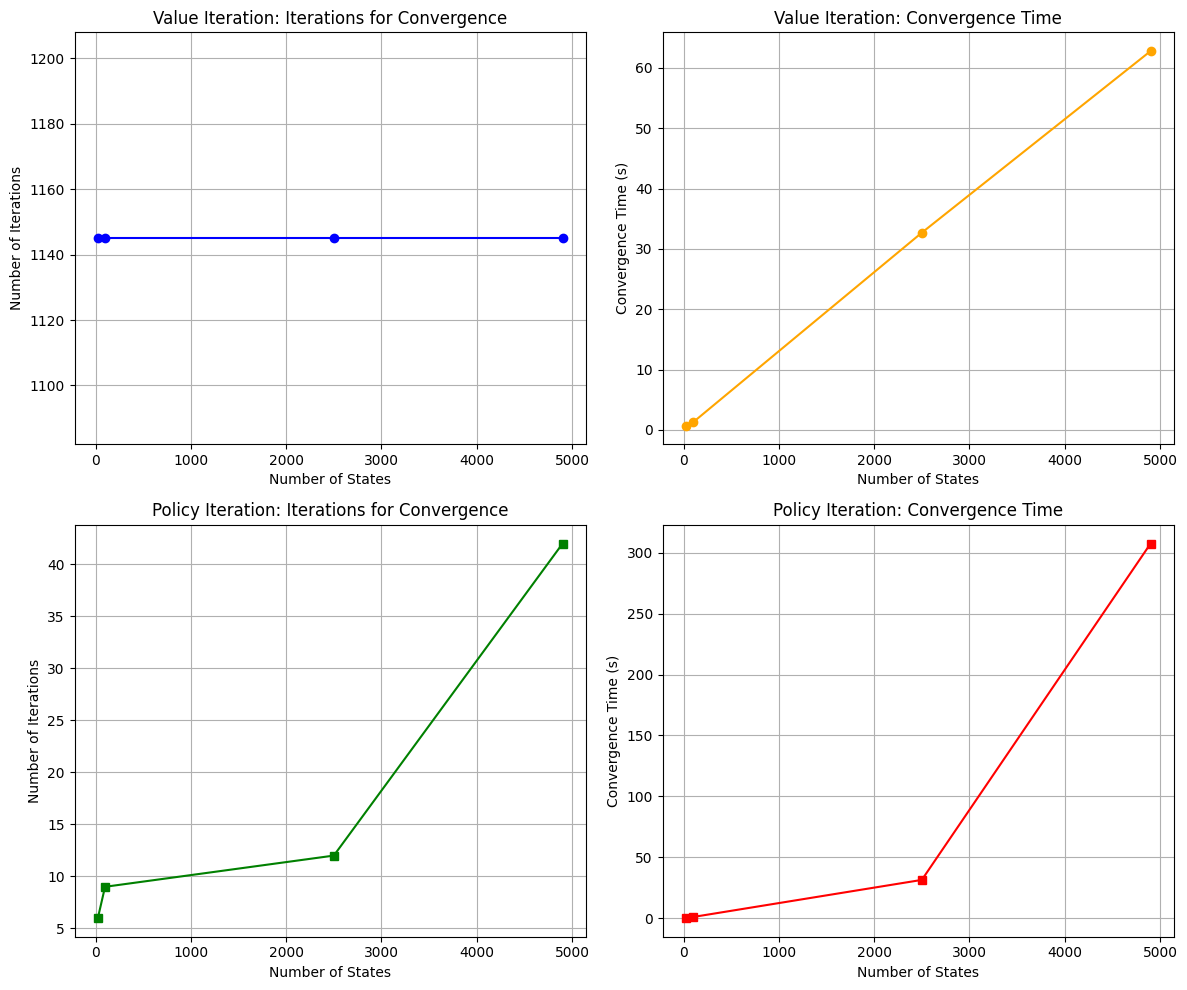

In [45]:
# number of states
states = [25, 100, 2500, 4900]

# value iteration data
vi_cnt = [vi_cnt_1, vi_cnt_2, vi_cnt_3, vi_cnt_4]
vi_time = [vi_time_1, vi_time_2, vi_time_3, vi_time_4]

# policy iteration data
pi_cnt = [pi_cnt_1, pi_cnt_2, pi_cnt_3, pi_cnt_4]
pi_time = [pi_time_1, pi_time_2, pi_time_3, pi_time_4]

# set up 2x2 grid for plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# value iteration - iterations vs states
axs[0, 0].plot(states, vi_cnt, marker='o', color='blue')
axs[0, 0].set_title('Value Iteration: Iterations for Convergence')
axs[0, 0].set_xlabel('Number of States')
axs[0, 0].set_ylabel('Number of Iterations')
axs[0, 0].grid(True)

# value iteration - time vs states
axs[0, 1].plot(states, vi_time, marker='o', color='orange')
axs[0, 1].set_title('Value Iteration: Convergence Time')
axs[0, 1].set_xlabel('Number of States')
axs[0, 1].set_ylabel('Convergence Time (s)')
axs[0, 1].grid(True)

# policy iteration - iterations vs states
axs[1, 0].plot(states, pi_cnt, marker='s', color='green')
axs[1, 0].set_title('Policy Iteration: Iterations for Convergence')
axs[1, 0].set_xlabel('Number of States')
axs[1, 0].set_ylabel('Number of Iterations')
axs[1, 0].grid(True)

# policy iteration - time vs states
axs[1, 1].plot(states, pi_time, marker='s', color='red')
axs[1, 1].set_title('Policy Iteration: Convergence Time')
axs[1, 1].set_xlabel('Number of States')
axs[1, 1].set_ylabel('Convergence Time (s)')
axs[1, 1].grid(True)

# adjust layout
plt.tight_layout()
plt.show()

# Answer to Part 2 Questions

### **Question**

### Design a more complicated maze environment of your own and re-run the algorithms designed for Part 1 on it. How does the number of states and the complexity of the environment affect convergence?

## **Answer**

### __Value Iteration__
- As the number of states increases, the number of iterations required for value iteration to converge remains fixed. This indicates that value iteration has a stable convergence pattern, unaffected by the increase in the number of states.

- The convergence time for value iteration increases linearly as the number of states grows. This suggests that while the algorithm is efficient, larger state spaces will require proportionally more time.

### __Policy Iteration__

- The number of iterations required for policy iteration to converge increases non-linearly with the number of states. This is because there are more state utility values to update and stabilize, leading to a more complex convergence process.

- With more states and a more complex environment, the computational complexity of each iteration in policy iteration increases exponentially. This can lead to significantly longer computation times for each iteration of policy evaluation and policy iteration.

### **Question**

### How complex can you make the environment and still be able to learn the right policy?

## **Answer**

The limits of policy learning were evident in our experiments. As shown in Table 4 (page 35), the algorithms could only achieve optimal policies within a 70x70 maze with obstacle density between 50-60%. Increased maze size or obstacle complexity resulted in learning failures (within 60 min).

# Conclusion

Both Value and Policy Iteration can still learn the optimal policy given enough time to converge, regardless of the number of states. However, as the environment becomes more complex, Policy Iteration may struggle with efficiency due to its exponential time growth, while Value Iteration remains more scalable for larger mazes.

For environments with a vast number of states, value iteration is likely to converge faster and more reliably than policy iteration. However, for smaller state spaces, policy iteration can sometimes converge in fewer iterations.